**Exercise 3.11 (Continuation of Exercise 3.5)**.  Return to the `wages` series.

**(a)**  Consider the residuals from a least squares fit of a quadratic time trend.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelations for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [1]:
source('utils.R')

Loading required package: ggplot2

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
data <- read.table("../data/wages.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1981-07"), freq = 12))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12

In [3]:
model = lm(wages ~ t + I(t^2), data=data)
summary(model)


Call:
lm(formula = wages ~ t + I(t^2), data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.148318 -0.041440  0.001563  0.050089  0.139839 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.496e+04  1.019e+04  -8.336 4.87e-12 ***
t            8.535e+01  1.027e+01   8.309 5.44e-12 ***
I(t^2)      -2.143e-02  2.588e-03  -8.282 6.10e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05889 on 69 degrees of freedom
Multiple R-squared:  0.9864,	Adjusted R-squared:  0.986 
F-statistic:  2494 on 2 and 69 DF,  p-value: < 2.2e-16


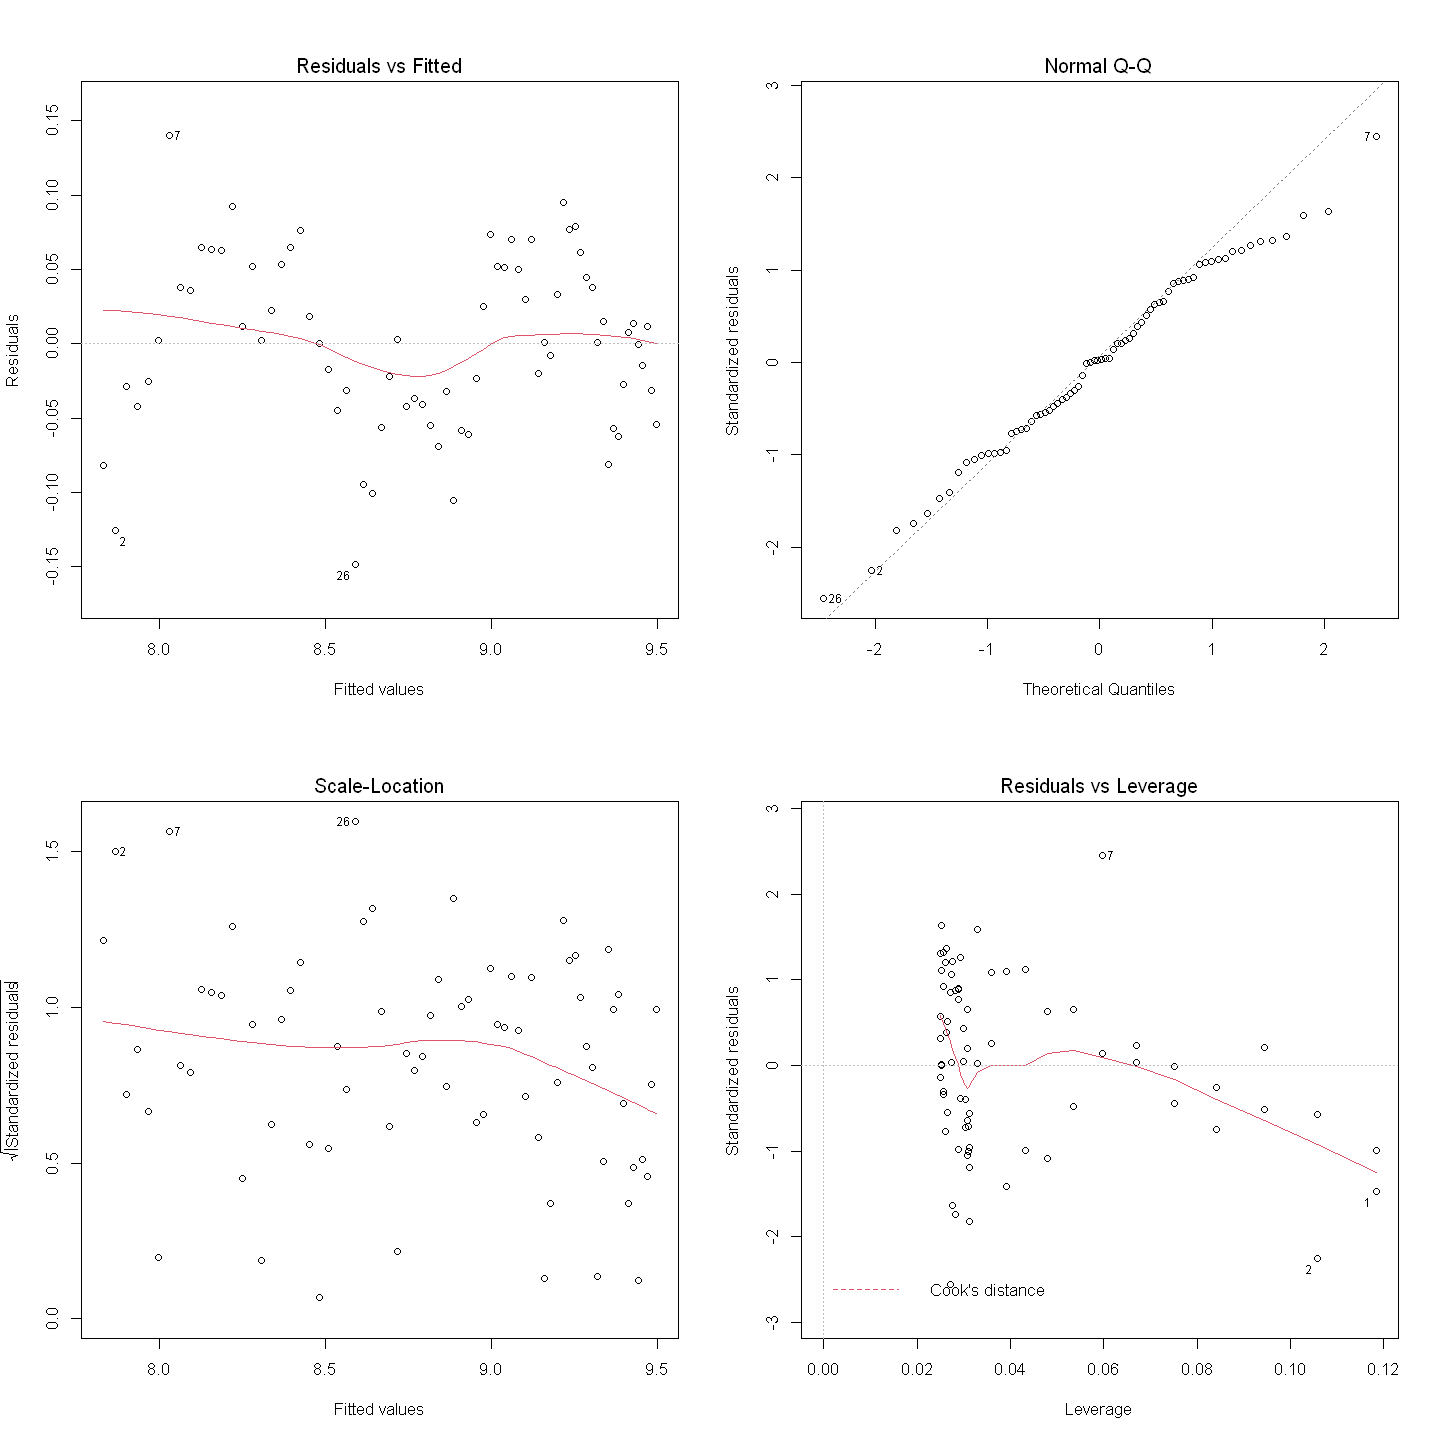

In [4]:
par(mfrow=c(2,2))
options(repr.plot.width=12, repr.plot.height=12)
plot(model)

Very high adjusted R square, but seasonality still present in residuals.

**(b)**

In [5]:
runs.test(factor(sign(rstandard(model))))


	Runs Test

data:  factor(sign(rstandard(model)))
Standard Normal = -5.1996, p-value = 1.997e-07
alternative hypothesis: two.sided


The Runs test gives very high confidence (p-value under 2e-7) that the standardized model residuals are not white noise.

**(c)**

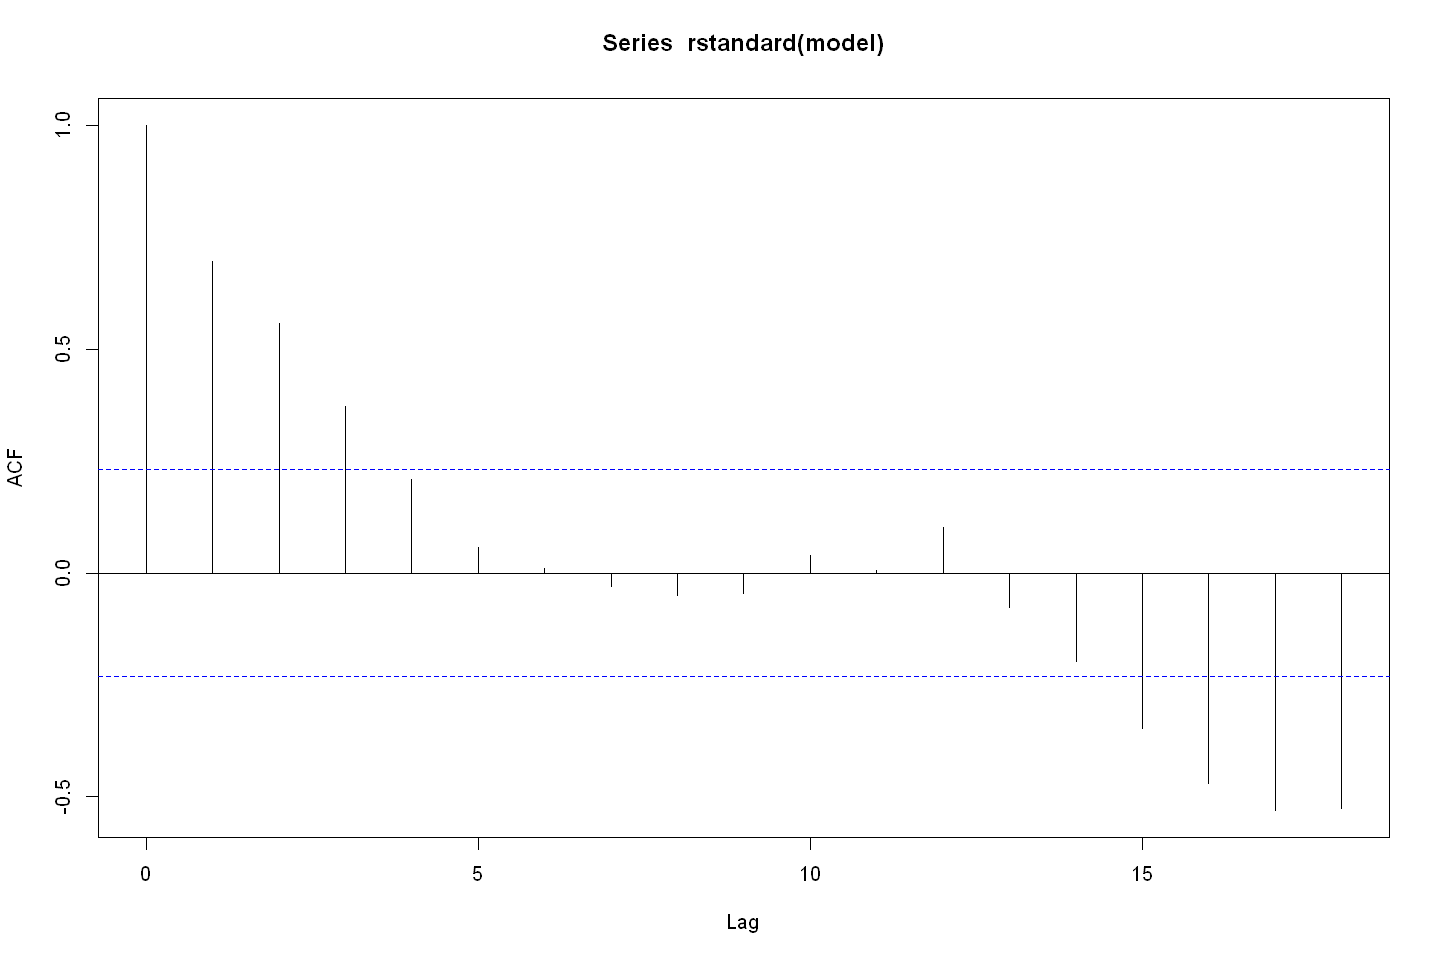

In [6]:
options(repr.plot.width=12, repr.plot.height=8)
acf(rstandard(model))

Many autocorrelations are present past the standard errors.  The wave format suggests some seasonality.

**(d)**

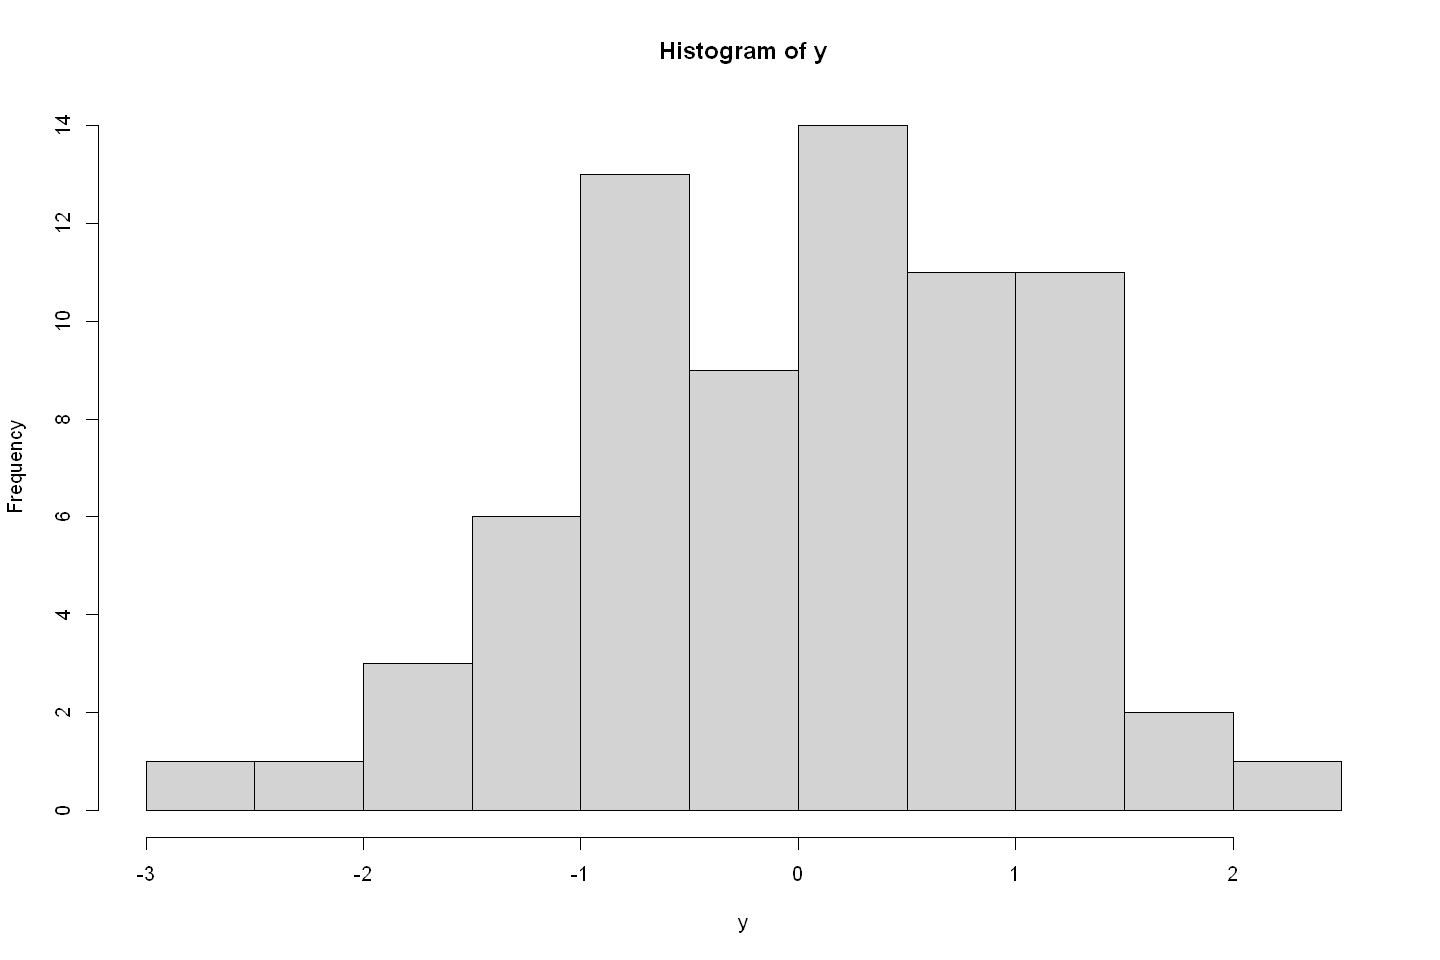

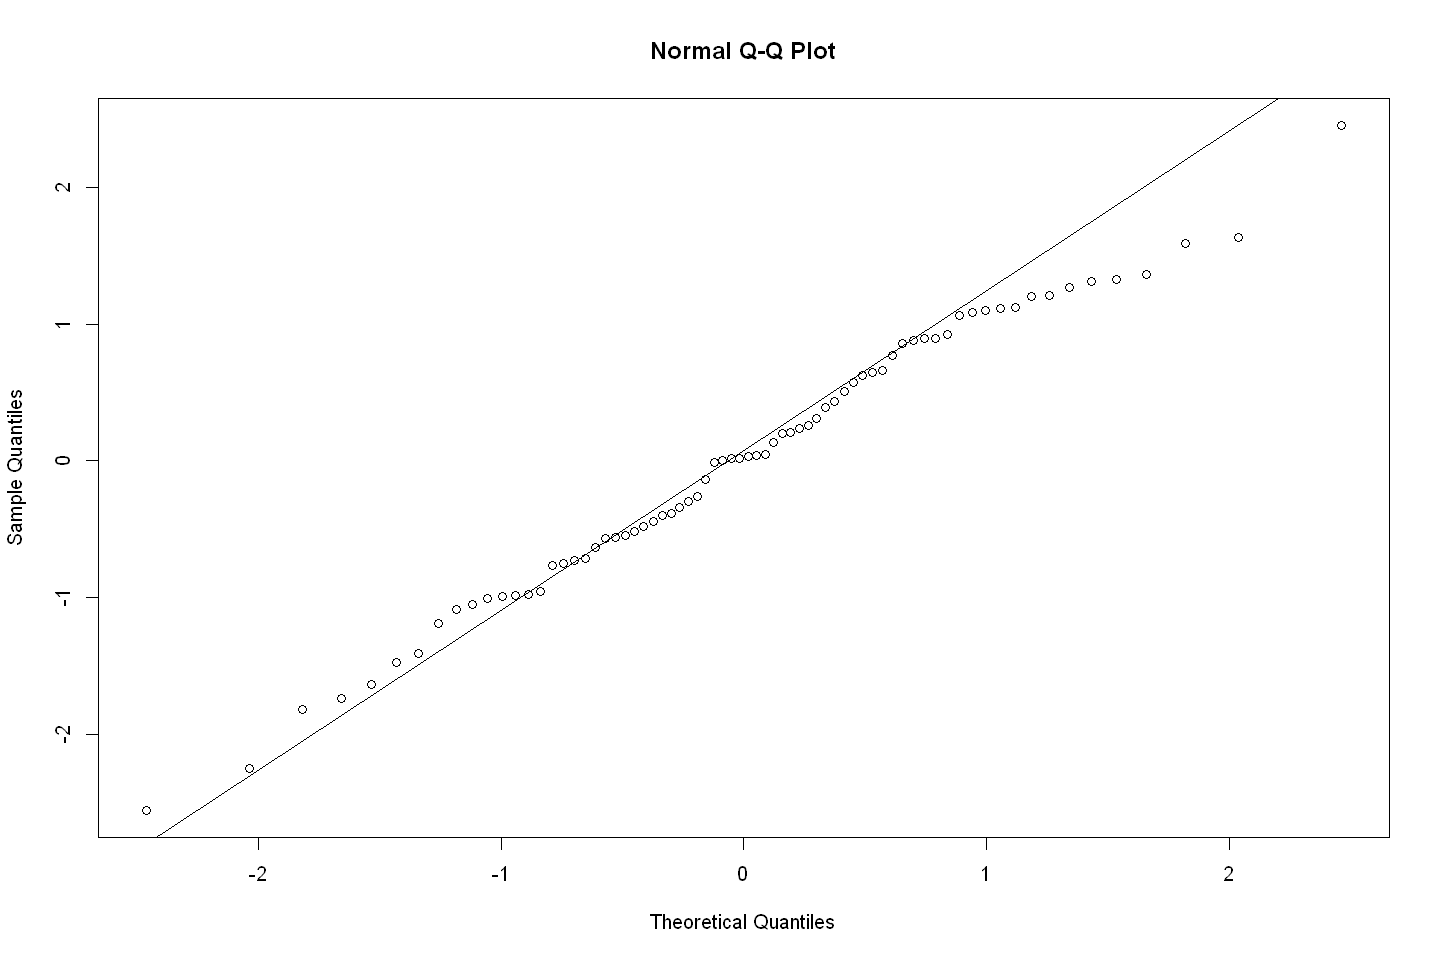

In [7]:
y = rstandard(model)
hist(y)
qqnorm(y); qqline(y)

Histogram of residuals seems skewed.  The Q-Q plot is overall aligned, but also indicates a non-ideal fit.

**Exercise 3.12 (Continuation of Exercise 3.6)**.  Consider the time series in the data file `beersales`.

**(a)**  Obtain the residuals from the least squares fit of the seasonal means plus quadratic time trend model.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelations for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [8]:
data <- read.table("../data/beersales.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1975-01"), freq = 12))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12
data['month'] = as.factor(format(data[['date']], "%m"))

In [9]:
model = lm(beersales ~ month + t + I(t^2), data=data)
summary(model)


Call:
lm(formula = beersales ~ month + t + I(t^2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03203 -0.43118  0.04977  0.34509  1.57572 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.150e+04  8.792e+03  -8.133 6.93e-14 ***
month02     -1.579e-01  2.090e-01  -0.755  0.45099    
month03      2.052e+00  2.090e-01   9.818  < 2e-16 ***
month04      2.353e+00  2.090e-01  11.256  < 2e-16 ***
month05      3.539e+00  2.090e-01  16.934  < 2e-16 ***
month06      3.776e+00  2.090e-01  18.065  < 2e-16 ***
month07      3.681e+00  2.090e-01  17.608  < 2e-16 ***
month08      3.507e+00  2.091e-01  16.776  < 2e-16 ***
month09      1.458e+00  2.091e-01   6.972 5.89e-11 ***
month10      1.126e+00  2.091e-01   5.385 2.27e-07 ***
month11     -1.894e-01  2.091e-01  -0.906  0.36622    
month12     -5.773e-01  2.092e-01  -2.760  0.00638 ** 
t            7.196e+01  8.867e+00   8.115 7.70e-14 ***
I(t^2)      -1.810e-02  2.236e-03  -8.096 8.63

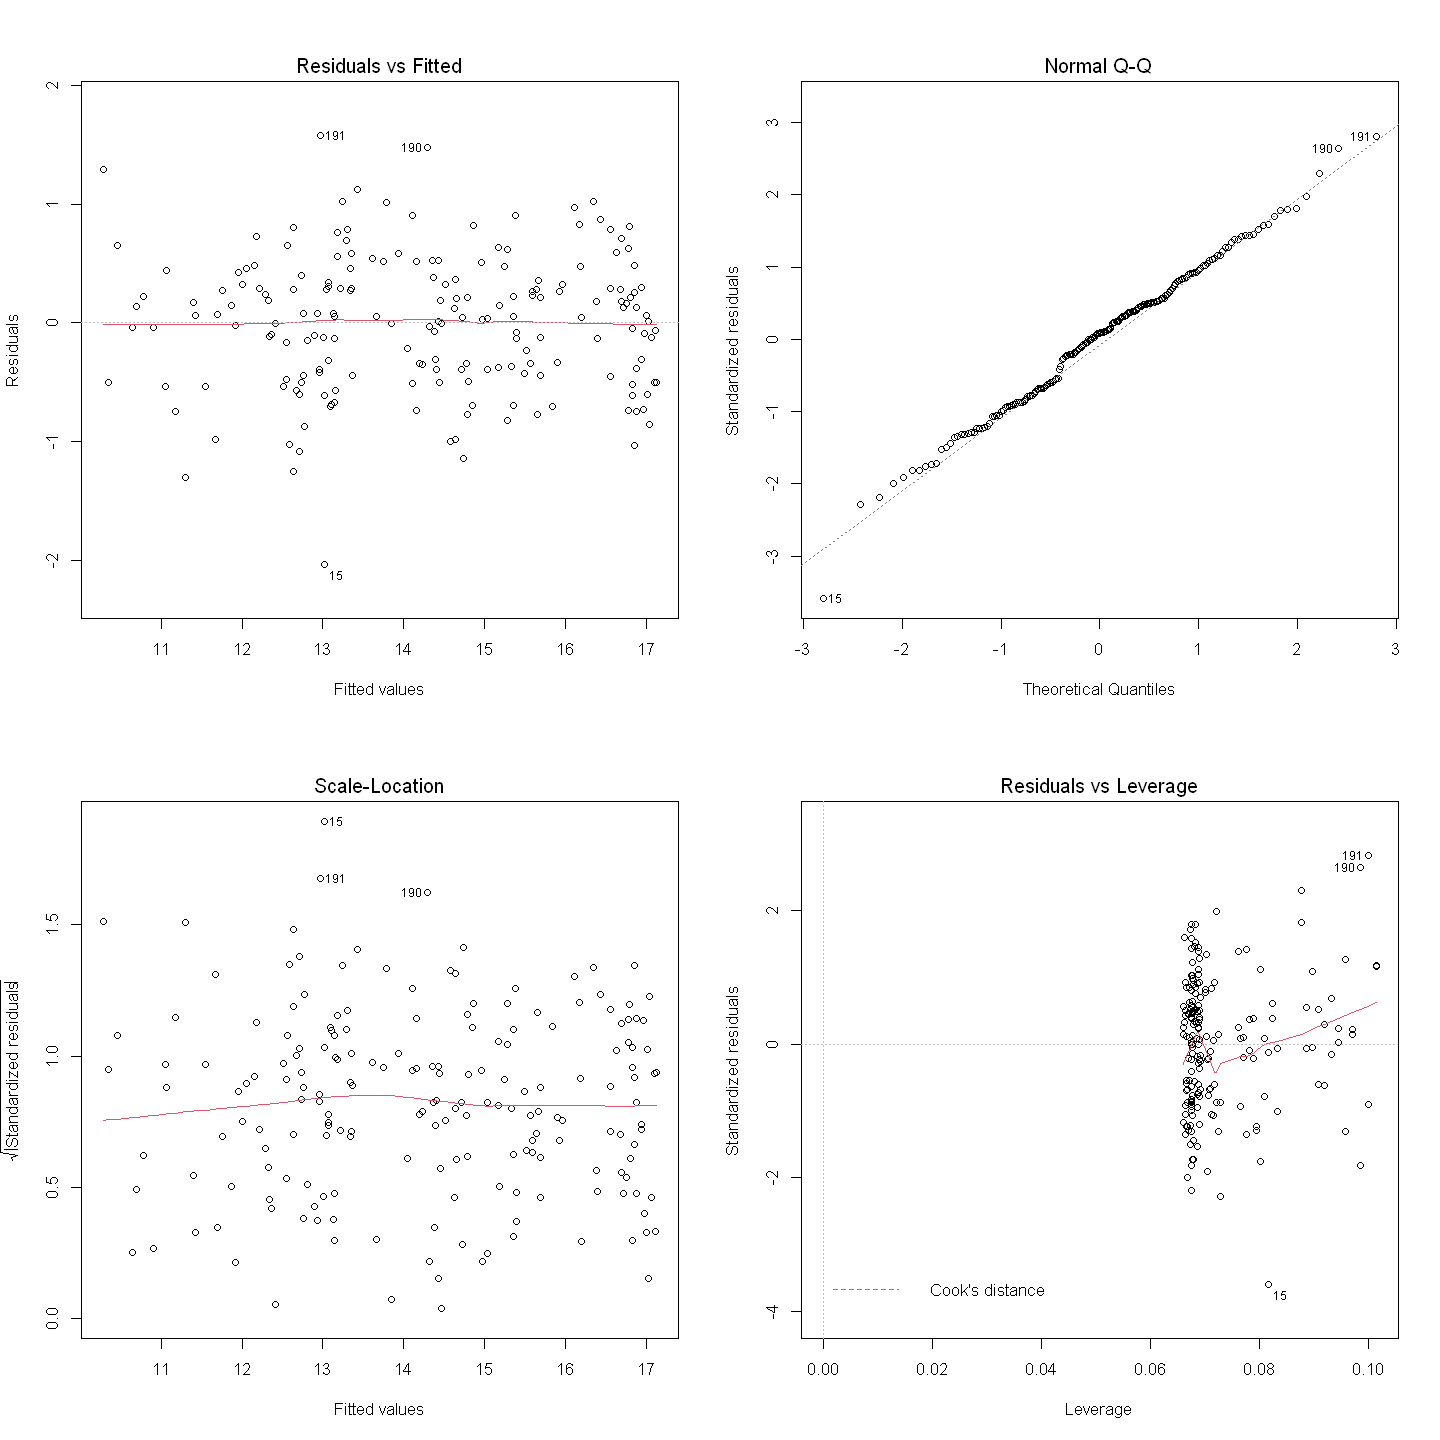

In [10]:
par(mfrow=c(2,2))
options(repr.plot.width=12, repr.plot.height=12)
plot(model)

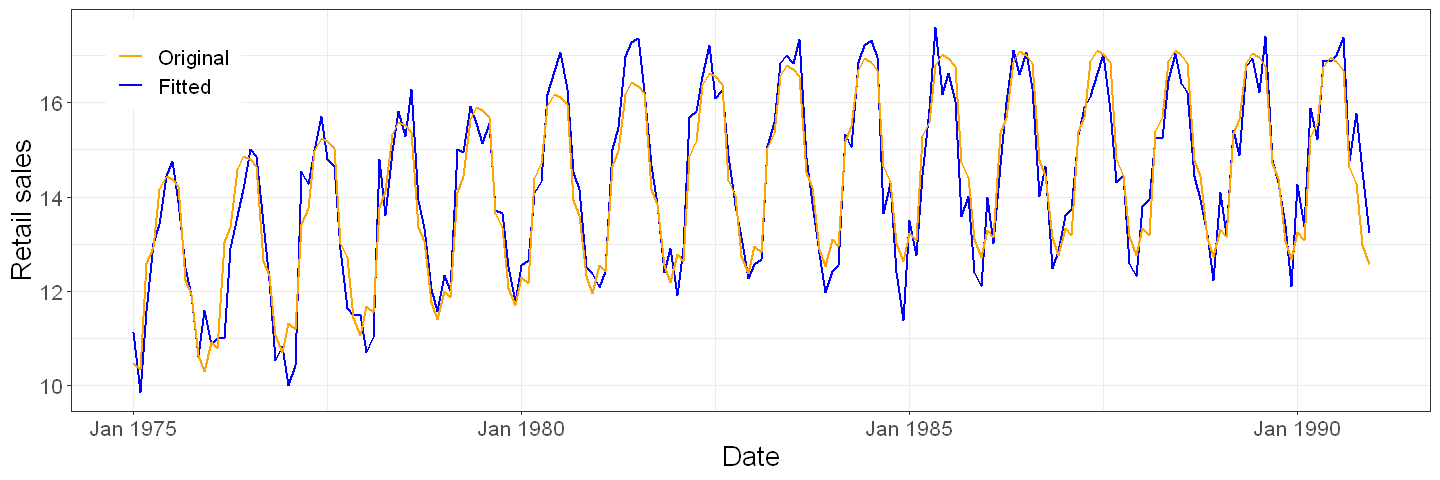

In [11]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data, aes(x=date)) + 
  geom_line(aes(y=beersales, color='Original'), size=0.75) +
  geom_line(aes(y=fitted(model), color='Fitted'), size=0.75) +
  xlab('Date') + ylab('Retail sales') + 
  theme_bw() + theme(text=element_text(size=16)) +
  scale_color_manual(
    values=c("Original" = "blue", "Fitted" = "orange"),
    labels = c("Original", "Fitted")
  ) +
  theme(
    legend.title=element_blank(),
    legend.position = c(.125, .975),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)
  )

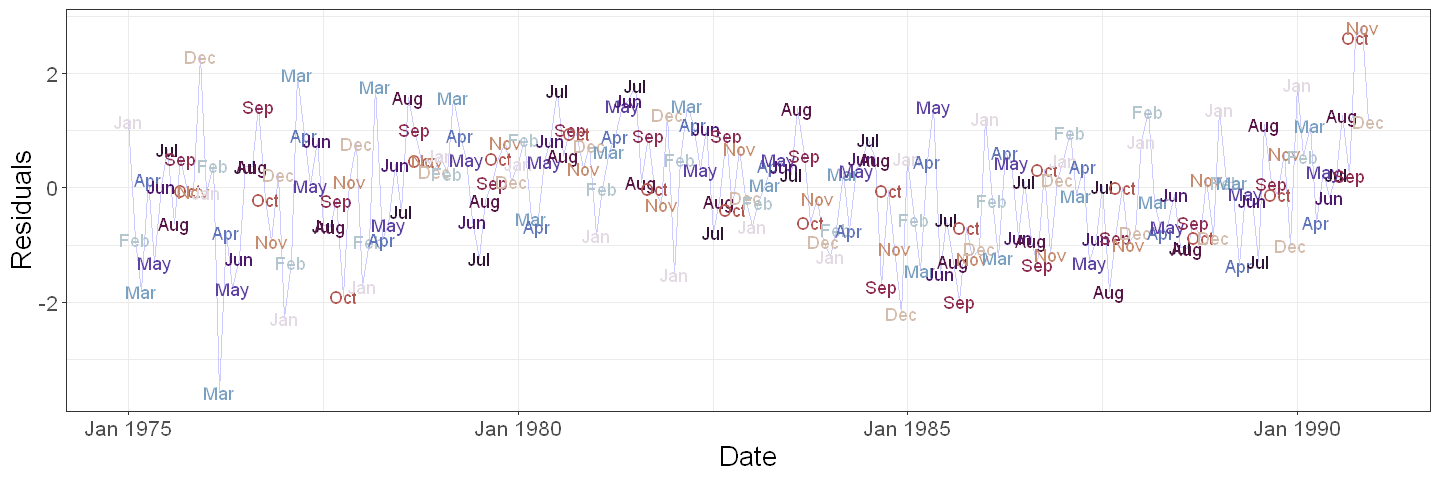

In [12]:
plot_monthly(data[['date']], rstandard(model), 'Date', 'Residuals')

There is still some seasonality not captured in the data by the month factors.  But the adjusted R squared is 0.904, most coefficients (other than two months) have significant p-values, and the overall behavior of the timeseires seems to be captured.

**(b)**

In [13]:
runs.test(factor(sign(rstandard(model))))


	Runs Test

data:  factor(sign(rstandard(model)))
Standard Normal = -2.5607, p-value = 0.01045
alternative hypothesis: two.sided


The Runs test still indicates that the residuals are not white noise, with a p-value of 0.01.

**(c)**

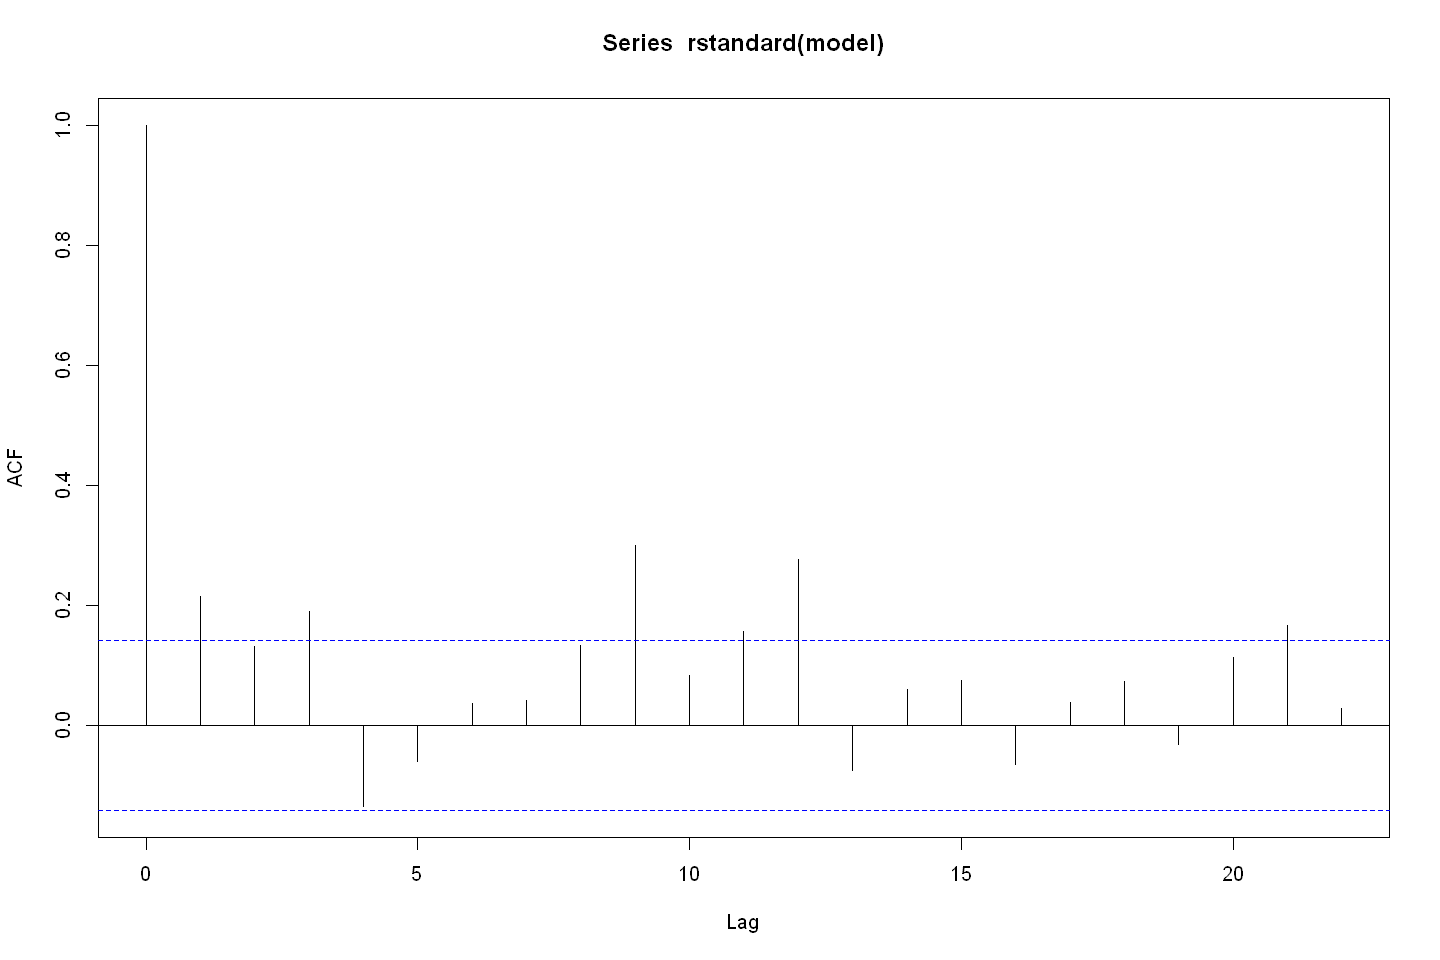

In [14]:
options(repr.plot.width=12, repr.plot.height=8)
acf(rstandard(model))

Some of the autocorrelation lags are still fairly high -- such as at 9 and 12 -- indicating some seasonality not captured by the model.

**(d)**

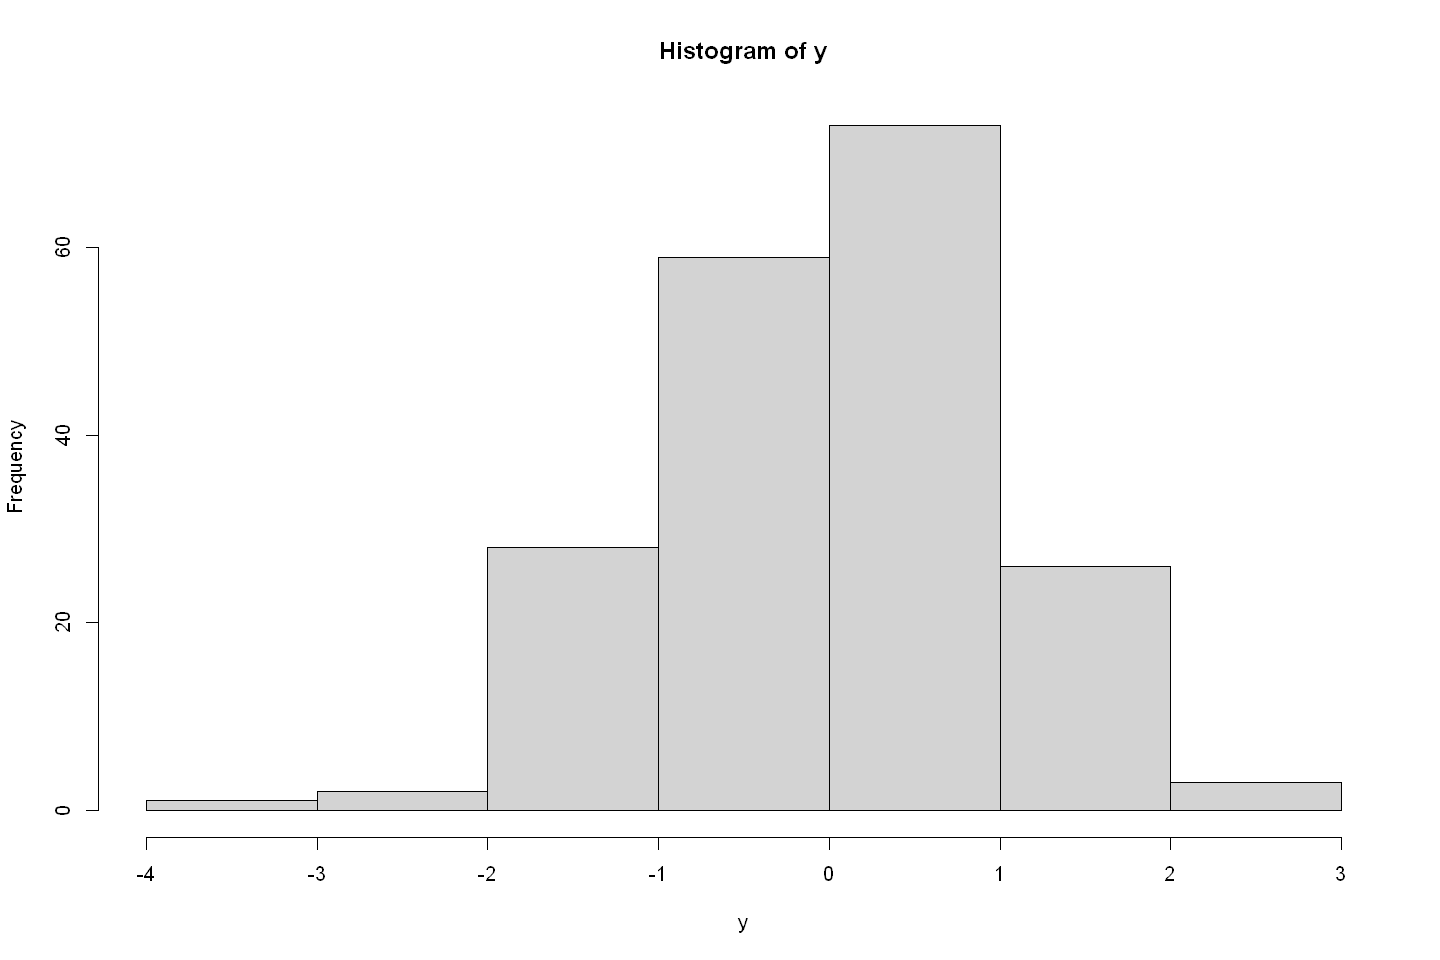

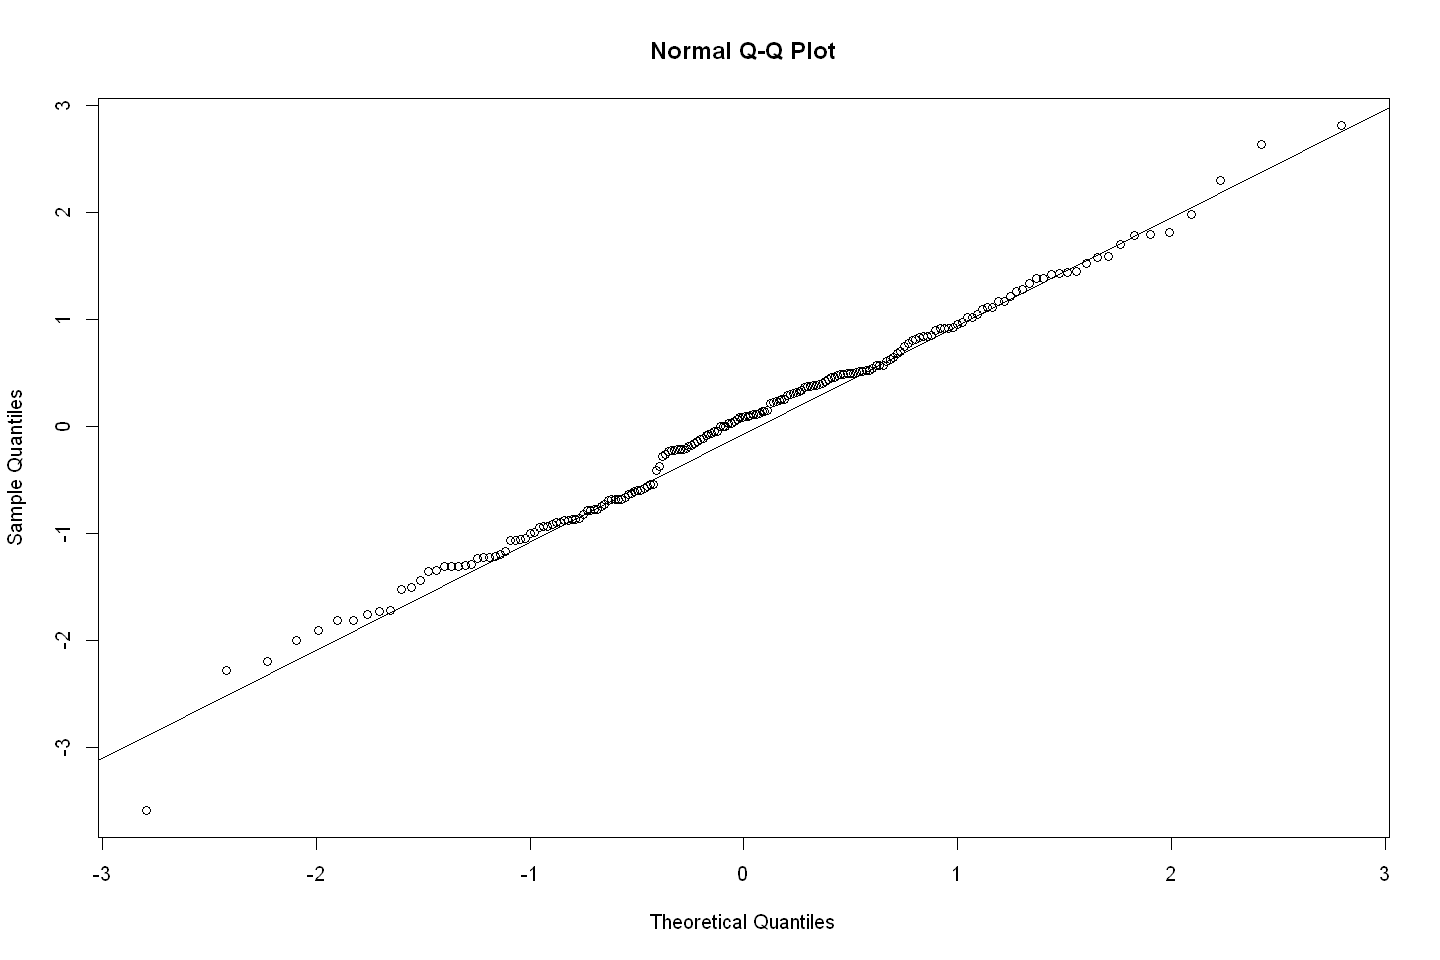

In [15]:
y = rstandard(model)
hist(y)
qqnorm(y); qqline(y)

Overall shape of histogram and Q-Q plot seem adequate, though there is a large tail on the negative side for the histogram.

**Exercise 3.13 (Continuation of Exercise 3.7)**.  Return to the `winnebago` time series.

**(a)**  Calculate the least squares residuals from a seasonal-means plus linear time trend model on the logarithm of the sales time series.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelations for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and the normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [16]:
data <- read.table("../data/winnebago.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1966-11"), freq = 12))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12
data['month'] = as.factor(format(data[['date']], "%m"))

In [17]:
model = lm(log(winnebago) ~ t + month, data=data)
summary(model)


Call:
lm(formula = log(winnebago) ~ t + month, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92501 -0.16328  0.03344  0.20757  0.57388 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -997.37304   50.64209 -19.695  < 2e-16 ***
t              0.50909    0.02571  19.800  < 2e-16 ***
month02        0.62445    0.18182   3.434 0.001188 ** 
month03        0.68220    0.19088   3.574 0.000779 ***
month04        0.80959    0.19079   4.243 9.30e-05 ***
month05        0.86953    0.19073   4.559 3.25e-05 ***
month06        0.86309    0.19070   4.526 3.63e-05 ***
month07        0.55392    0.19069   2.905 0.005420 ** 
month08        0.56989    0.19070   2.988 0.004305 ** 
month09        0.57572    0.19073   3.018 0.003960 ** 
month10        0.26349    0.19079   1.381 0.173300    
month11        0.28682    0.18186   1.577 0.120946    
month12        0.24802    0.18182   1.364 0.178532    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.

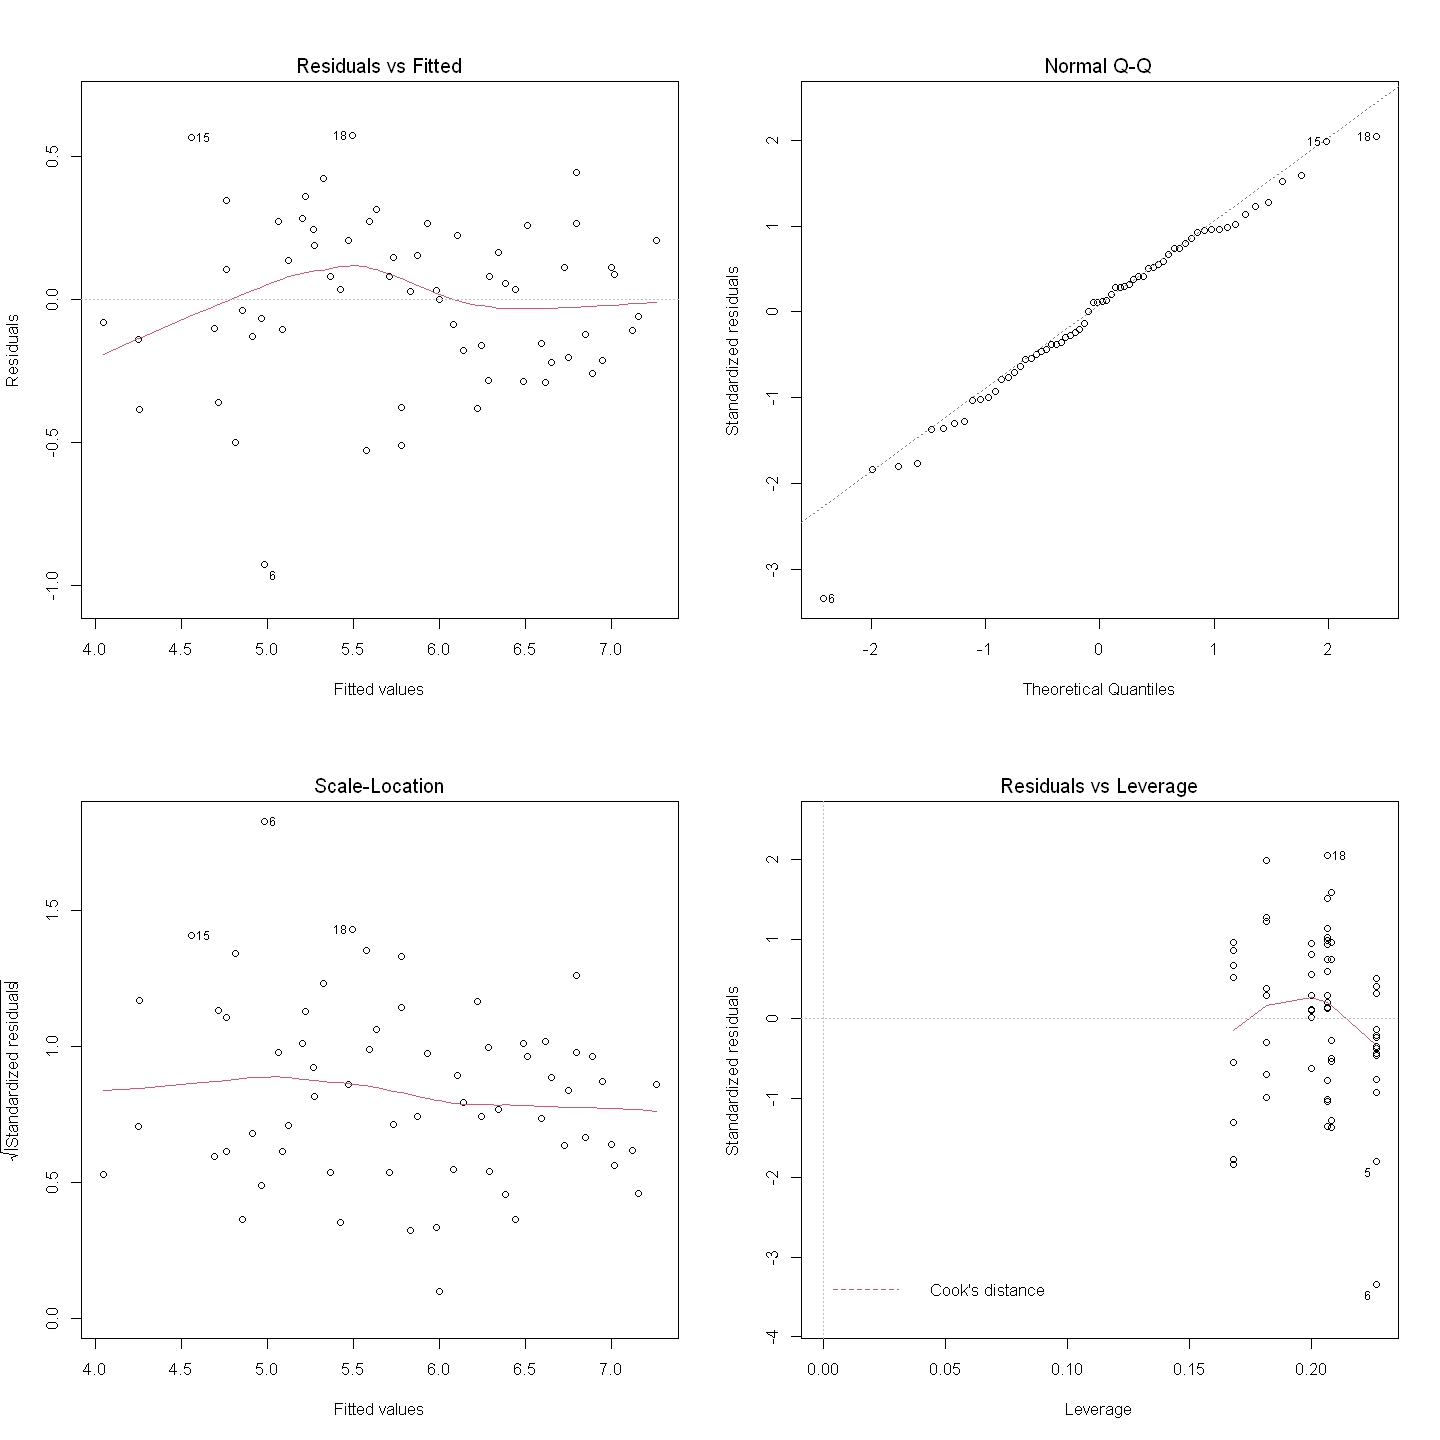

In [18]:
par(mfrow=c(2,2))
options(repr.plot.width=12, repr.plot.height=12)
plot(model)

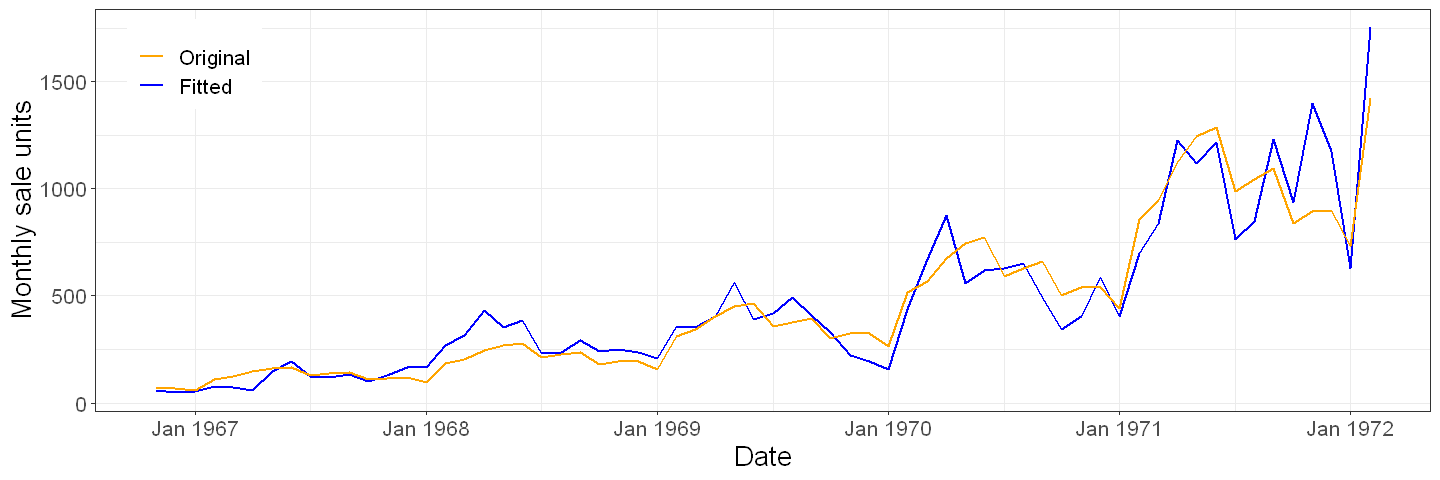

In [19]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data, aes(x=date)) + 
  geom_line(aes(y=winnebago, color='Original'), size=0.75) +
  geom_line(aes(y=exp(fitted(model)), color='Fitted'), size=0.75) +
  xlab('Date') + ylab('Monthly sale units') + 
  theme_bw() + theme(text=element_text(size=16)) +
  scale_color_manual(
    values=c("Original" = "blue", "Fitted" = "orange"),
    labels = c("Original", "Fitted")
  ) +
  theme(
    legend.title=element_blank(),
    legend.position = c(.125, .975),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)
  )

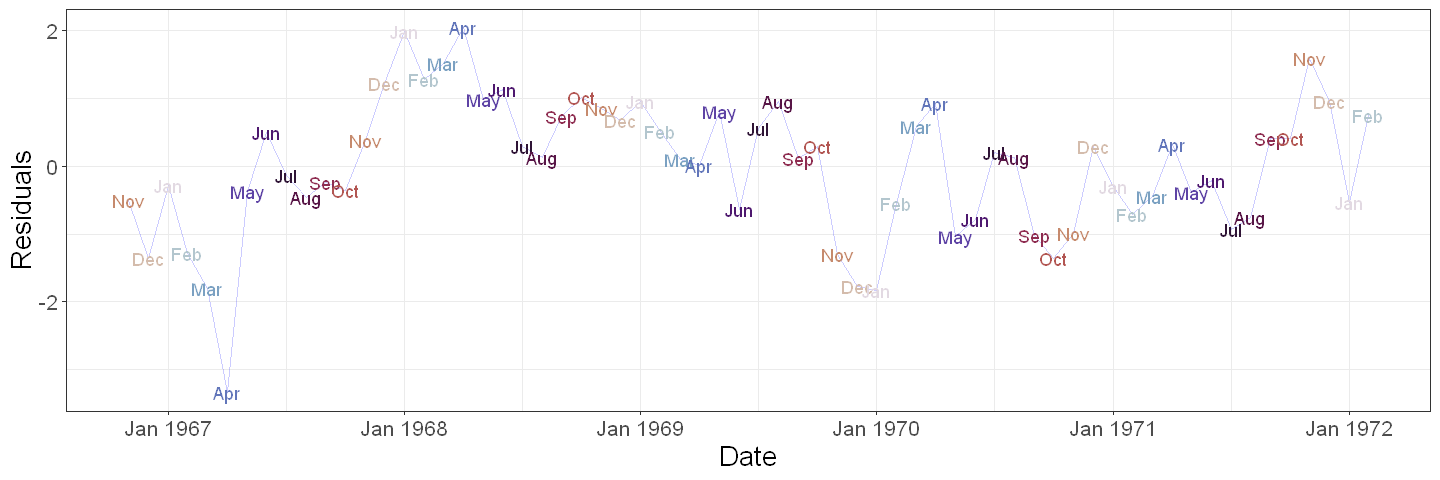

In [20]:
plot_monthly(data[['date']], rstandard(model), 'Date', 'Residuals')

Most regression coefficients are significative, and adjusted R square is at 0.87.  Overall trend values seem to have been mostly removed, but some seasonality is still in place.

**(b)**

In [21]:
runs.test(factor(sign(rstandard(model))))


	Runs Test

data:  factor(sign(rstandard(model)))
Standard Normal = -3.7427, p-value = 0.0001821
alternative hypothesis: two.sided


The Runs test indicates, with p-value of 1.8e-4, that the residuals are not white noise.

**(c)**

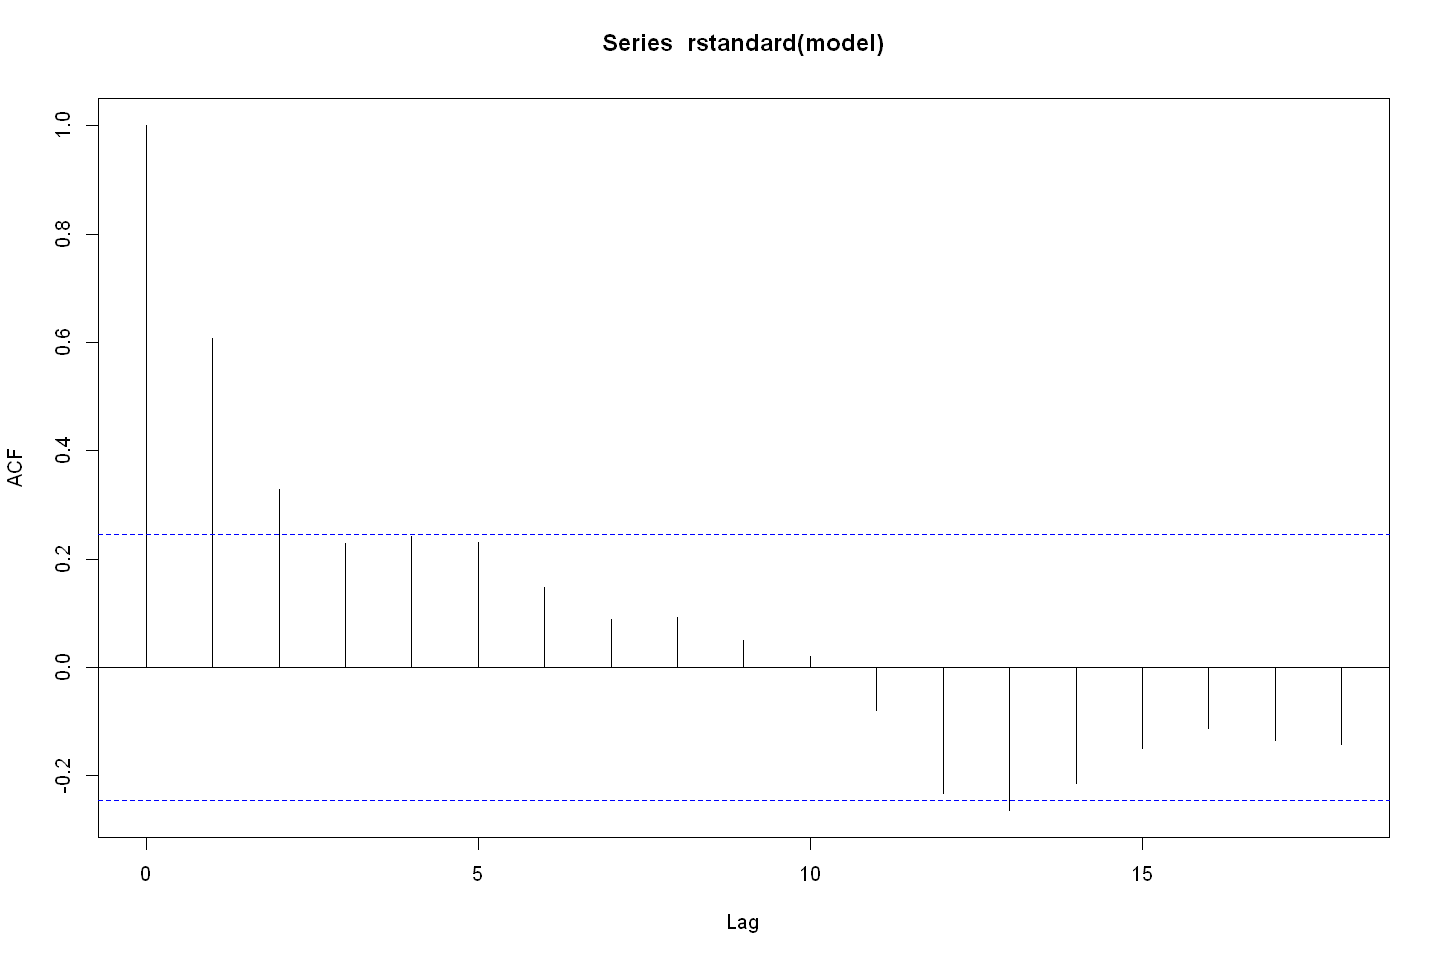

In [22]:
options(repr.plot.width=12, repr.plot.height=8)
acf(rstandard(model))

Autocorrelation values are improved over previous models, but there is still a significant lag at $k = 1$, and some potentially meaningful lages at $k = 2, 3, 13$.

**(d)**

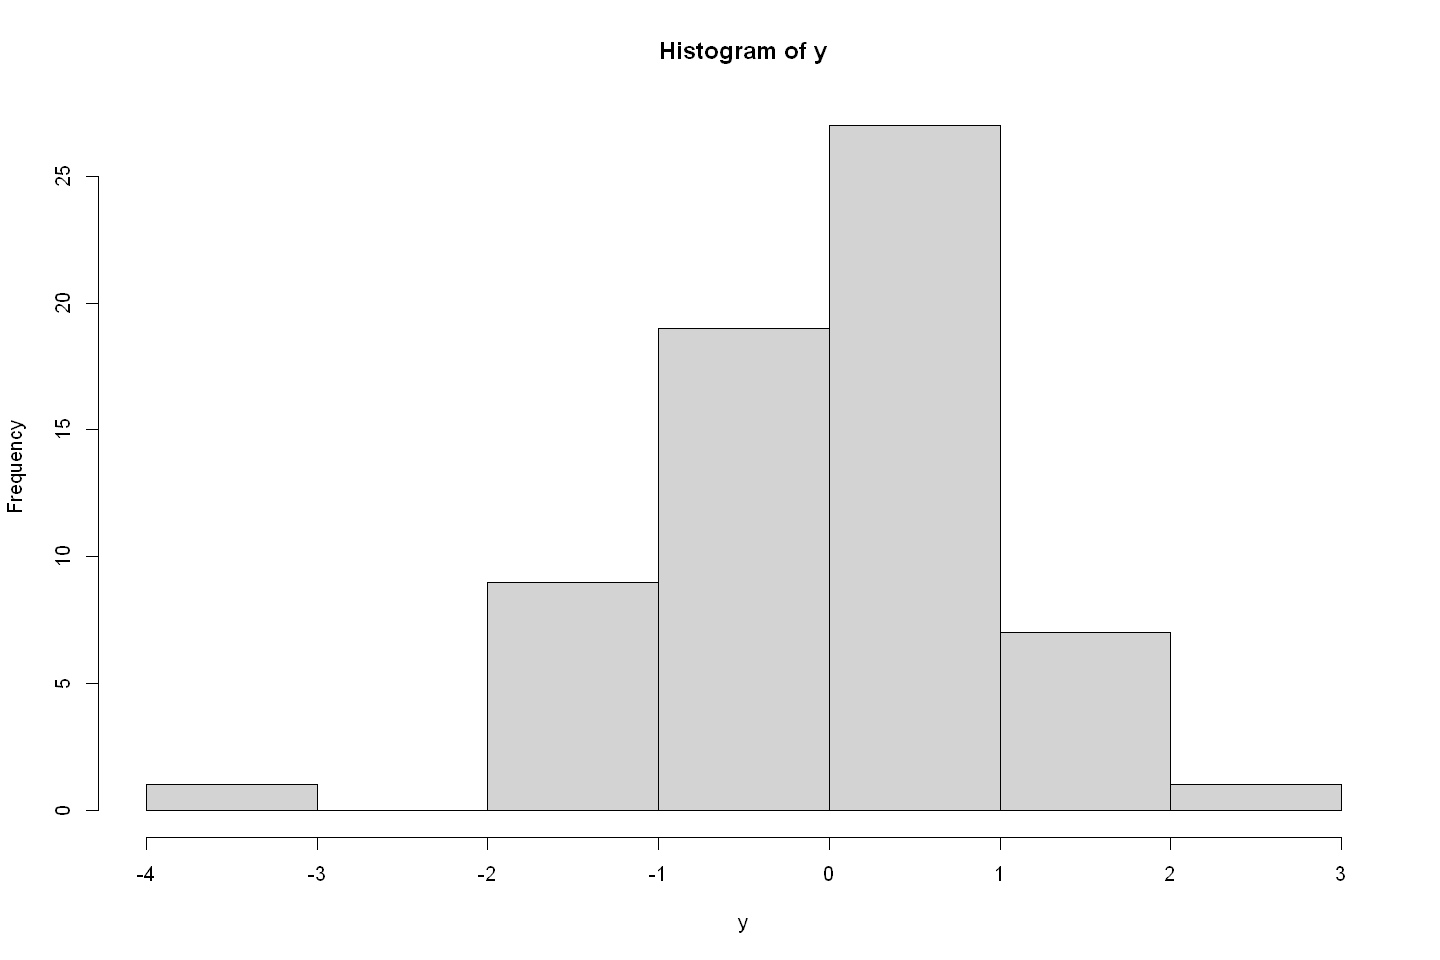

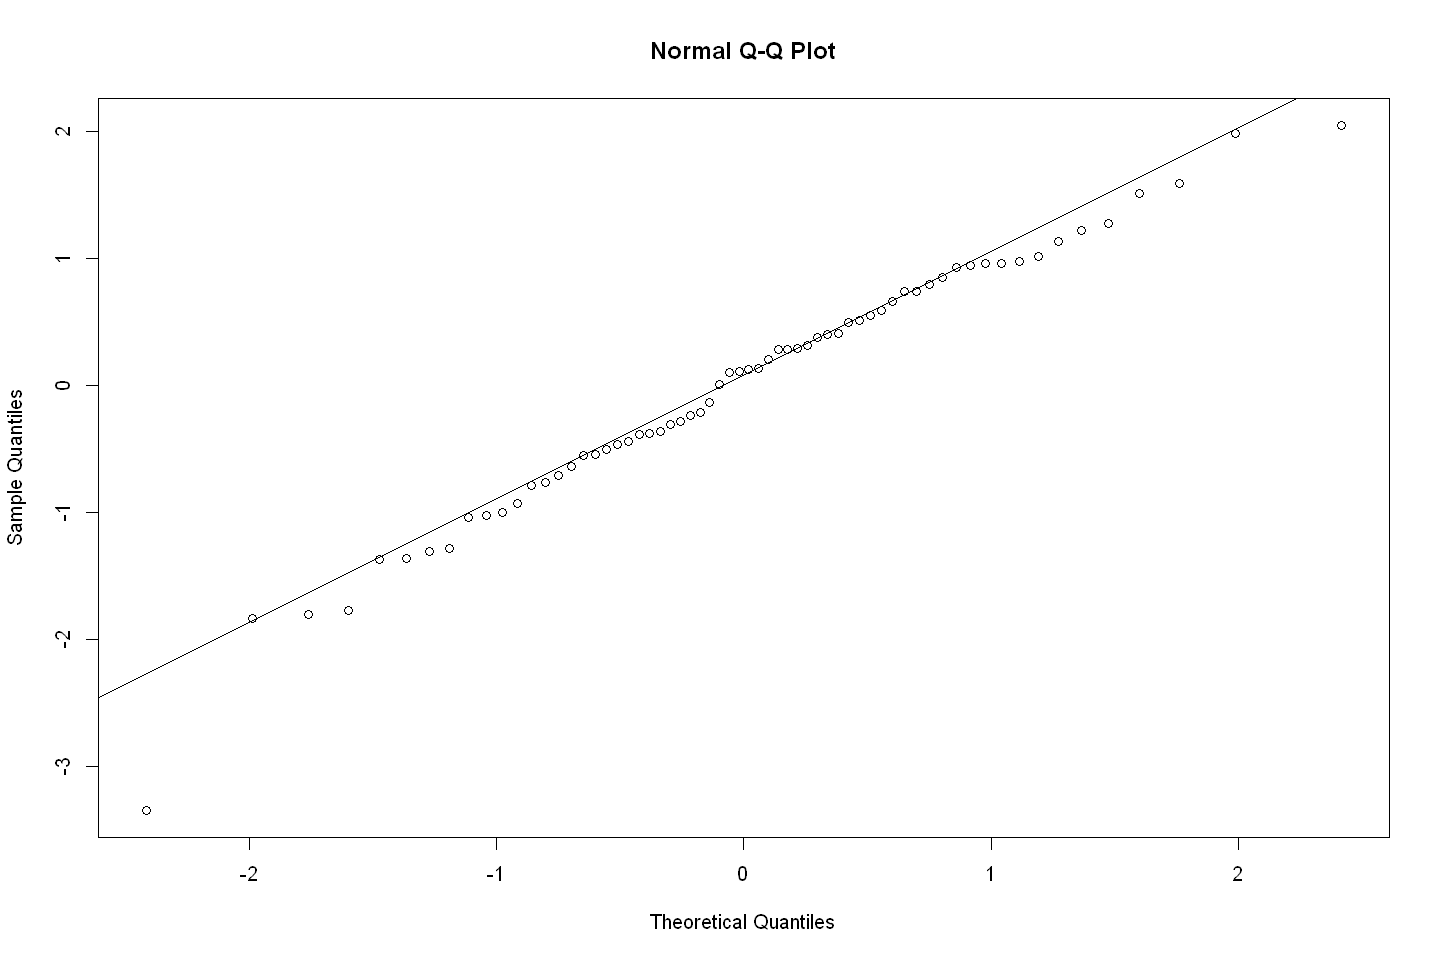

In [23]:
y = rstandard(model)
hist(y)
qqnorm(y); qqline(y)

Histogram of residuals seem skewed, while the Q-Q plot has a vague S shape, suggesting that the residuals are not normal.

**Exercise 3.14 (Continuation of Exercise 3.8)**.   The data file `retail` contains U.K monthly retail sales figures.

**(a)**  Obtain the least squares residuals from a seasonal-means plus linear time trend model.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelation for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [24]:
data <- read.table("../data/retail.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1986-01"), freq = 12))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12
data['month'] = as.factor(format(data[['date']], "%m"))

In [25]:
model = lm(retail ~ t + month, data=data)
summary(model)


Call:
lm(formula = retail ~ t + month, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.8950  -2.4440  -0.3518   2.1971  16.2045 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.250e+03  8.724e+01 -83.099  < 2e-16 ***
t            3.670e+00  4.369e-02  83.995  < 2e-16 ***
month02     -3.015e+00  1.290e+00  -2.337  0.02024 *  
month03      7.469e-02  1.290e+00   0.058  0.95387    
month04      3.447e+00  1.305e+00   2.641  0.00880 ** 
month05      3.108e+00  1.305e+00   2.381  0.01803 *  
month06      3.074e+00  1.305e+00   2.355  0.01932 *  
month07      6.053e+00  1.305e+00   4.638 5.76e-06 ***
month08      3.138e+00  1.305e+00   2.404  0.01695 *  
month09      3.428e+00  1.305e+00   2.626  0.00919 ** 
month10      8.555e+00  1.305e+00   6.555 3.34e-10 ***
month11      2.082e+01  1.305e+00  15.948  < 2e-16 ***
month12      5.254e+01  1.305e+00  40.255  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0

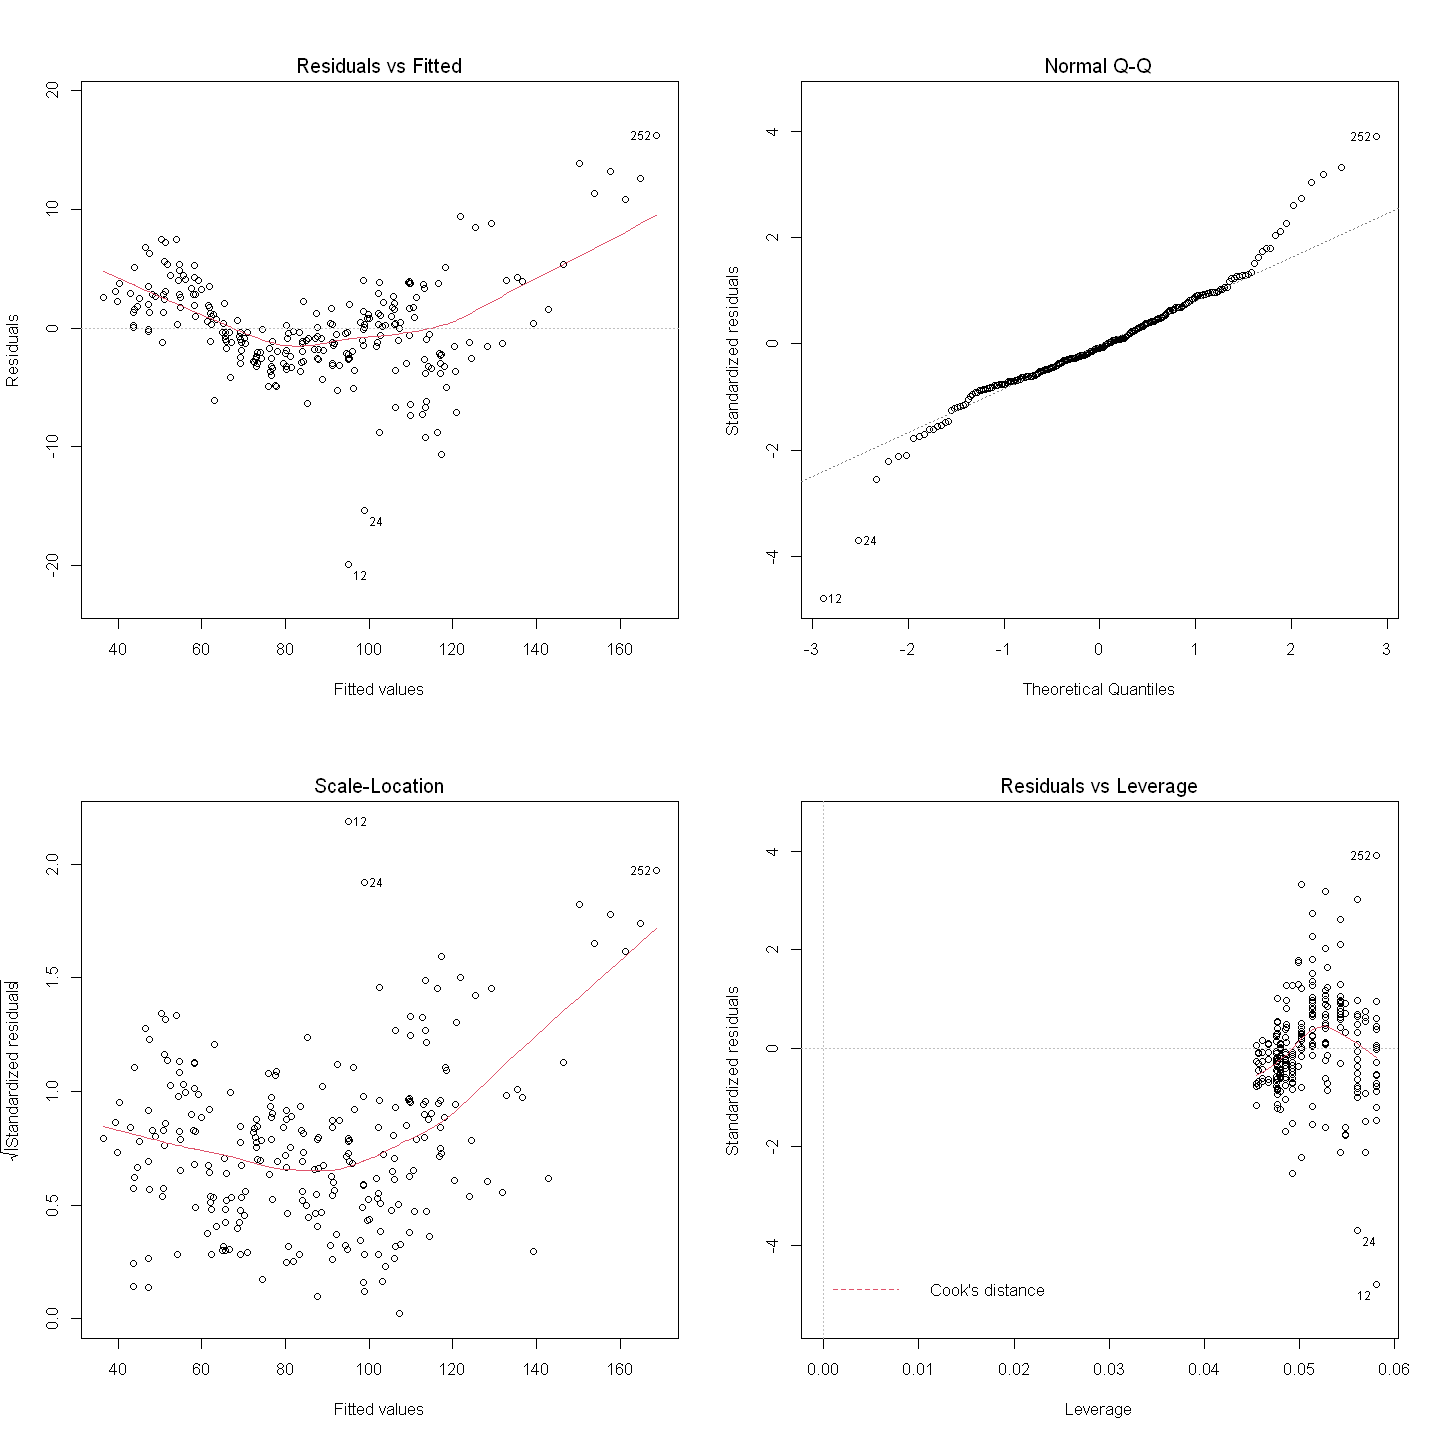

In [26]:
par(mfrow=c(2,2))
options(repr.plot.width=12, repr.plot.height=12)
plot(model)

Fairly high adjusted R squared, with all regression coefficient significants except for one month.  Some seasonality is still not captured.

**(b)**

In [27]:
runs.test(factor(sign(rstandard(model))))


	Runs Test

data:  factor(sign(rstandard(model)))
Standard Normal = -9.5717, p-value < 2.2e-16
alternative hypothesis: two.sided


The Runs test indicates, with p-value under 2.2e-16, that the residuals are not white noise.

**(c)**

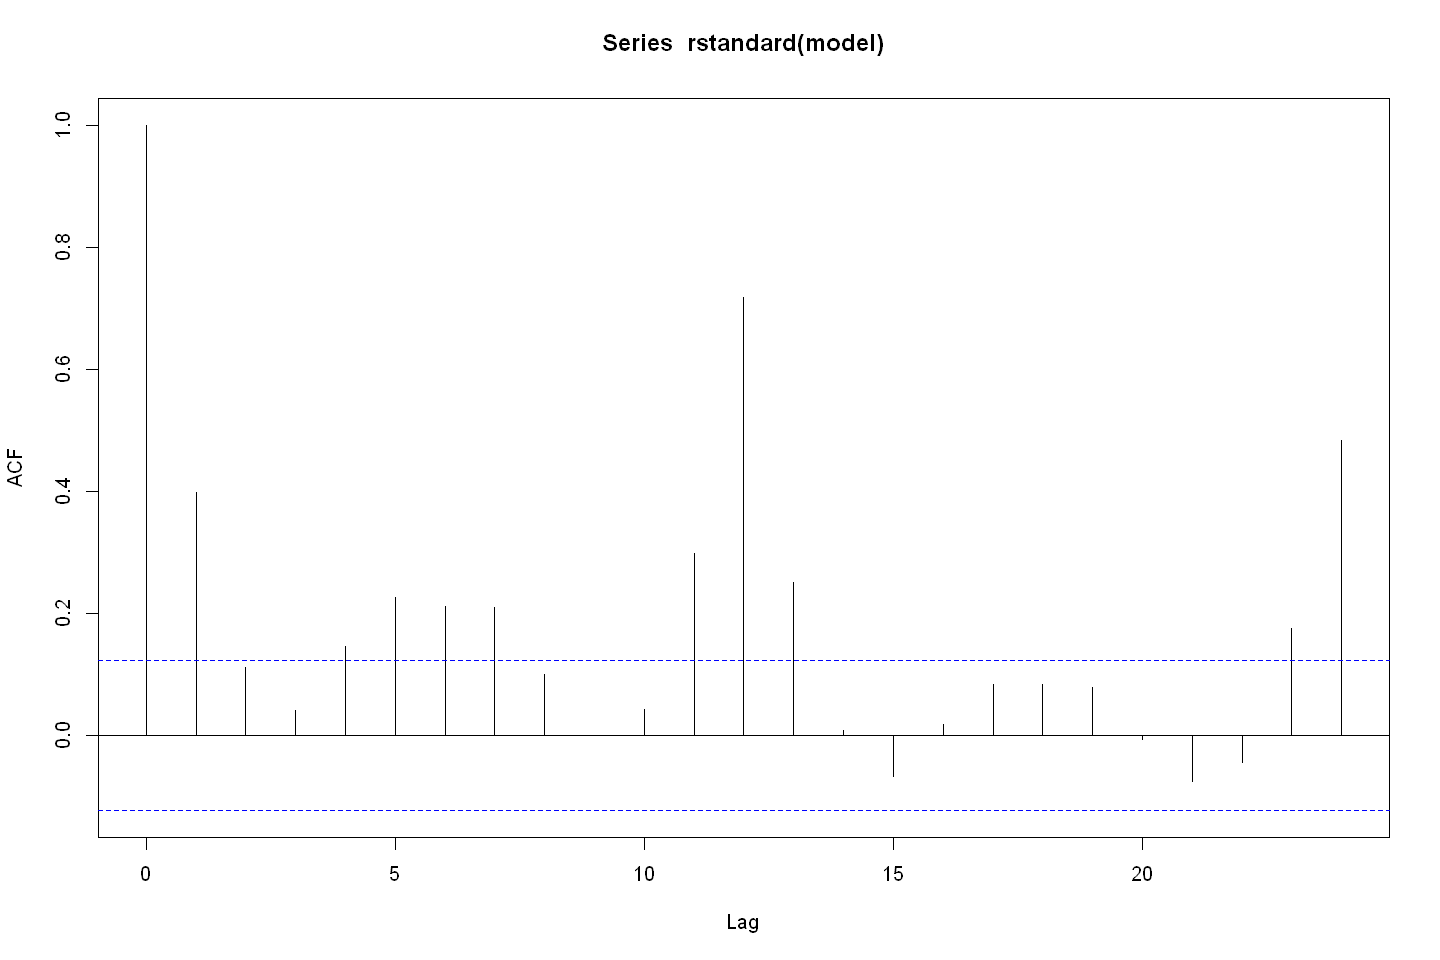

In [28]:
options(repr.plot.width=12, repr.plot.height=8)
acf(rstandard(model))

Very large spike at lag $k = 12$.  Seasonality is not fully captured.

**(d)**

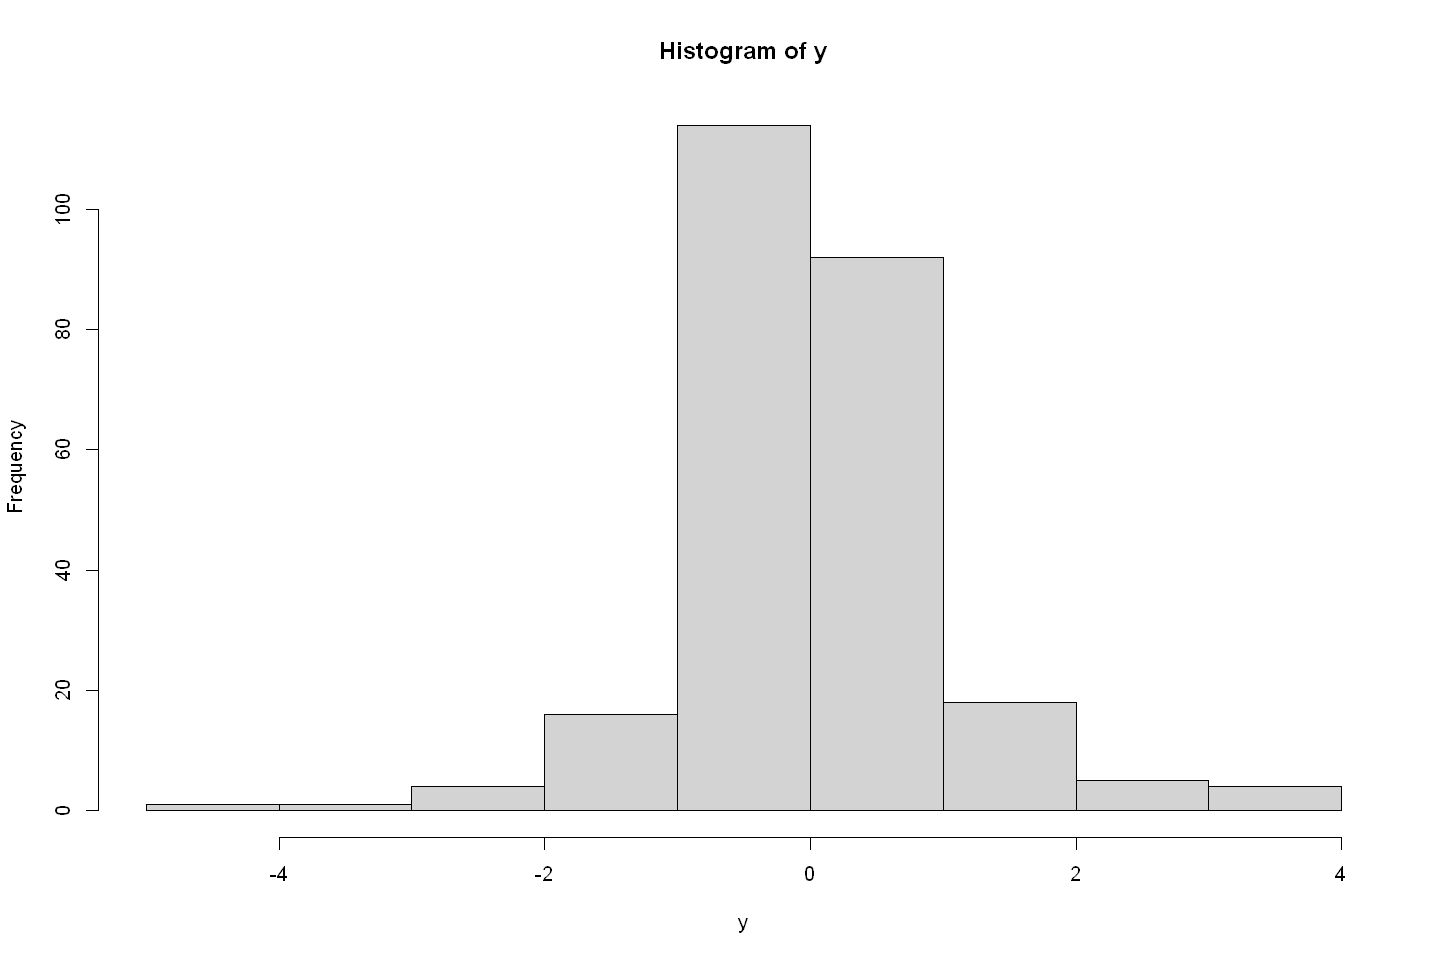

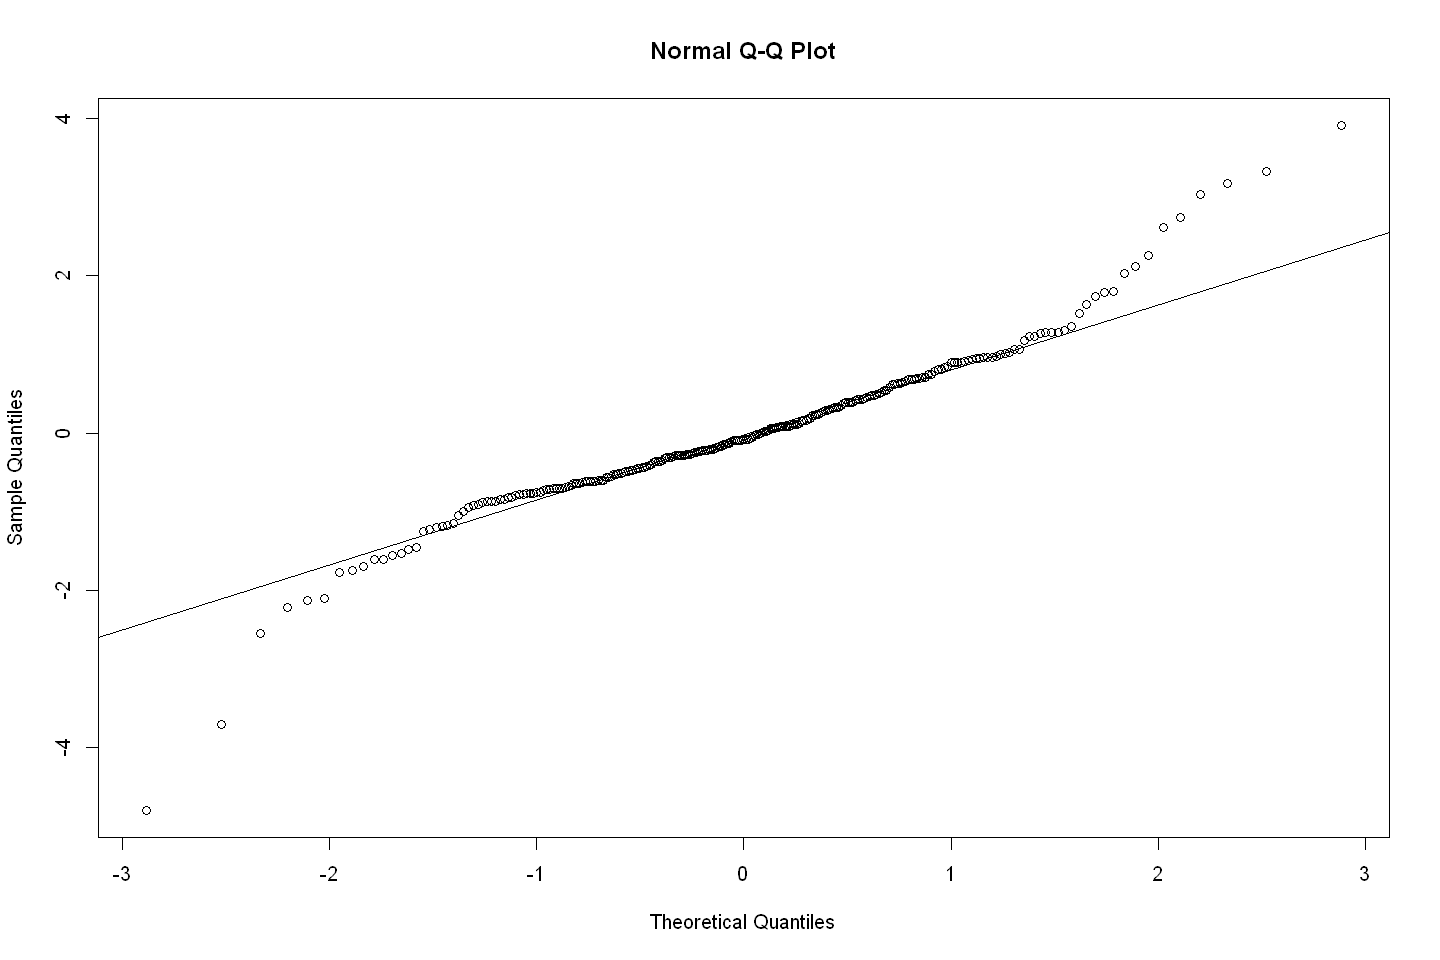

In [29]:
y = rstandard(model)
hist(y)
qqnorm(y); qqline(y)

While the histogram does not hint clearly at the large tails, the Q-Q plot is very S-shaped, indicating that the residuals are not normal.

**Exercise 3.15 (Continuation of Exercise 3.9)**.  Consider again the  `prescrip` time series.

**(a)**  Save the standardized results from a least squares fit of a coside trend with fundamental frequency 1/12 to the percentage change time series.

**(b)**  Perform a runs test on the standardized residuals and interpret the results.

**(c)**  Calculate and interpret the sample autocorrelations for the standardized residuals.

**(d)**  Investigate the normality of the standardized residuals (error terms).  Consider histograms and normal probability plots.  Interpret the plots.

**Solution**.

**(a)**

In [30]:
data <- read.table("../data/prescrip.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1966-11"), freq = 12))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12
data['month'] = as.factor(format(data[['date']], "%m"))

require(data.table)
y = data[['prescrip']]
data[['percent_change']] = 100 * (y / shift(y) - 1)

Loading required package: data.table



In [31]:
# t is in years, so the fundamental frequency is f = 1/12 year = 1 month

model = lm(percent_change ~ I(cos(2 * pi * t)) + I(sin(2 * pi * t)), data=data)
summary(model)


Call:
lm(formula = percent_change ~ I(cos(2 * pi * t)) + I(sin(2 * 
    pi * t)), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8444 -1.3742  0.1697  1.4069  3.8980 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.2217     0.2325   5.254 1.82e-06 ***
I(cos(2 * pi * t))  -1.1104     0.3254  -3.413  0.00112 ** 
I(sin(2 * pi * t))  -1.3960     0.3313  -4.213 8.04e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.897 on 64 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3148,	Adjusted R-squared:  0.2933 
F-statistic:  14.7 on 2 and 64 DF,  p-value: 5.584e-06


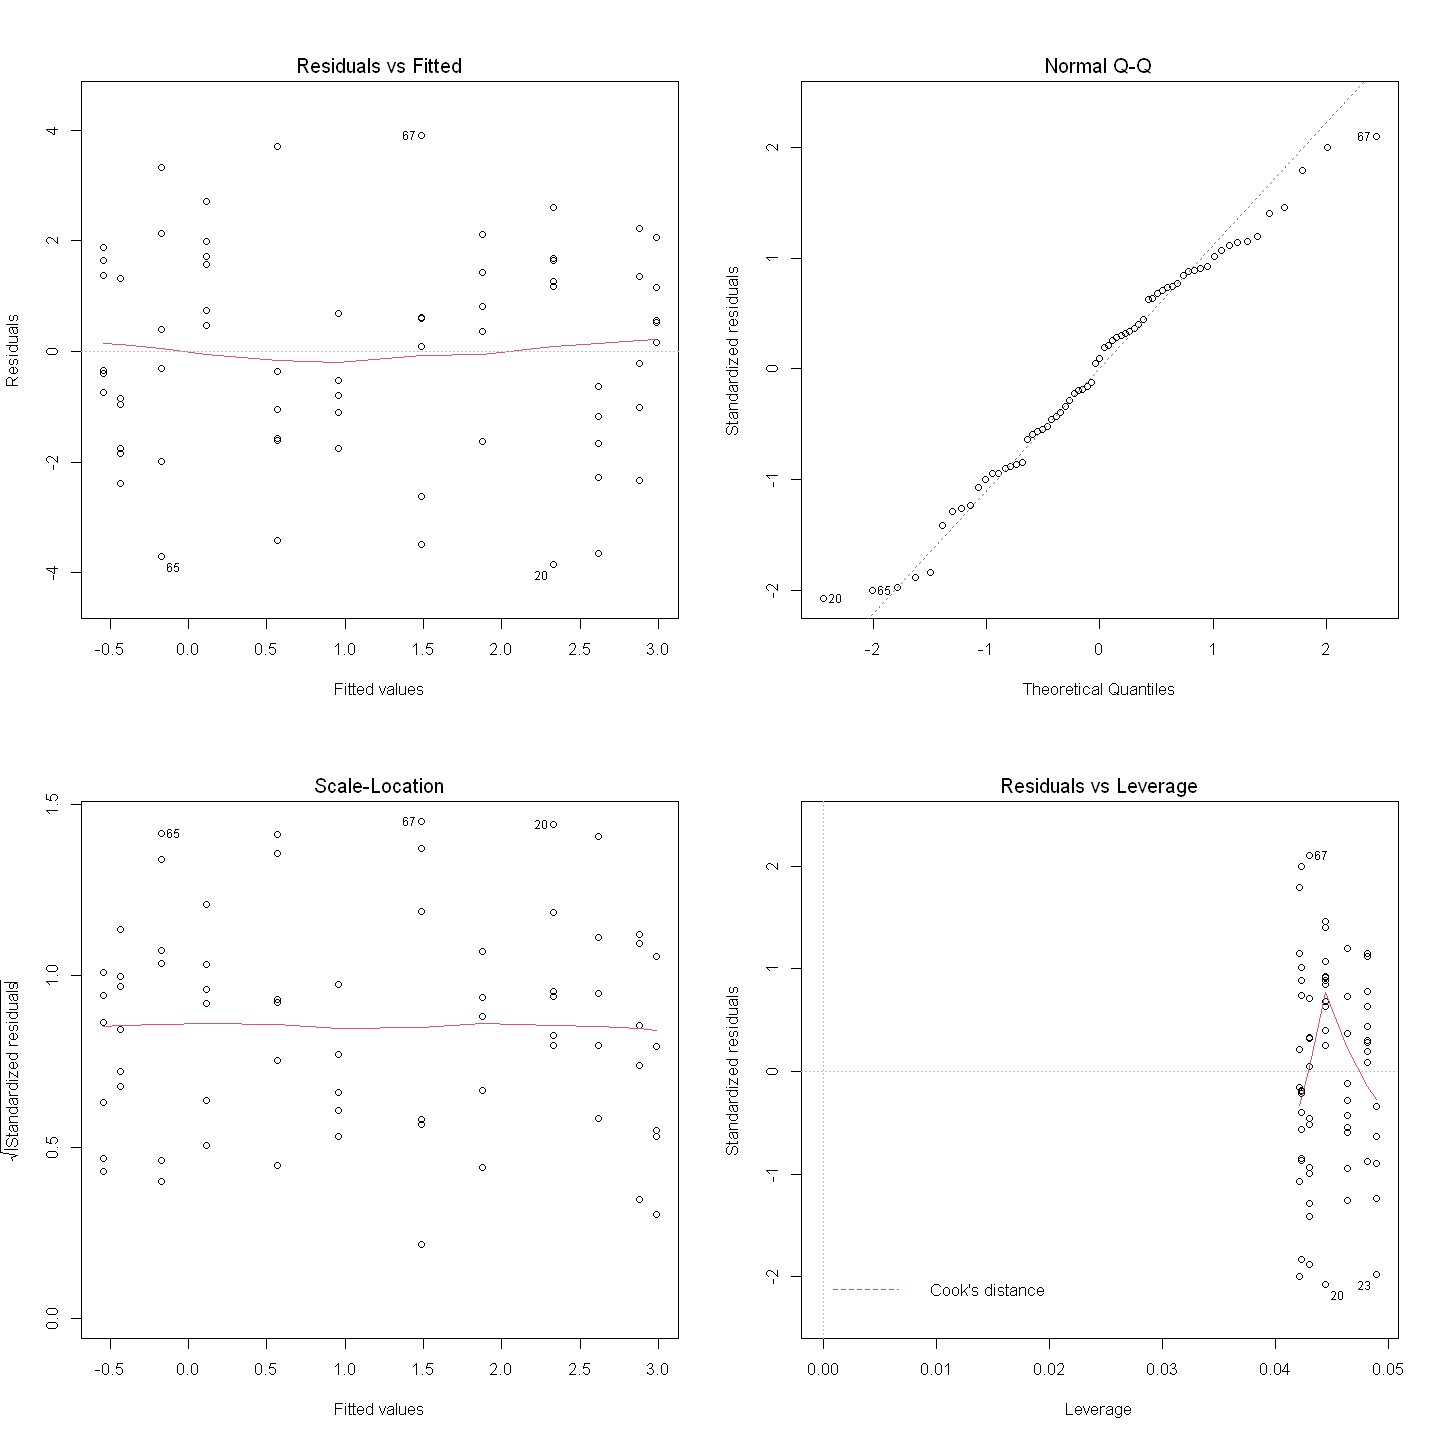

In [32]:
par(mfrow=c(2,2))
options(repr.plot.width=12, repr.plot.height=12)
plot(model)

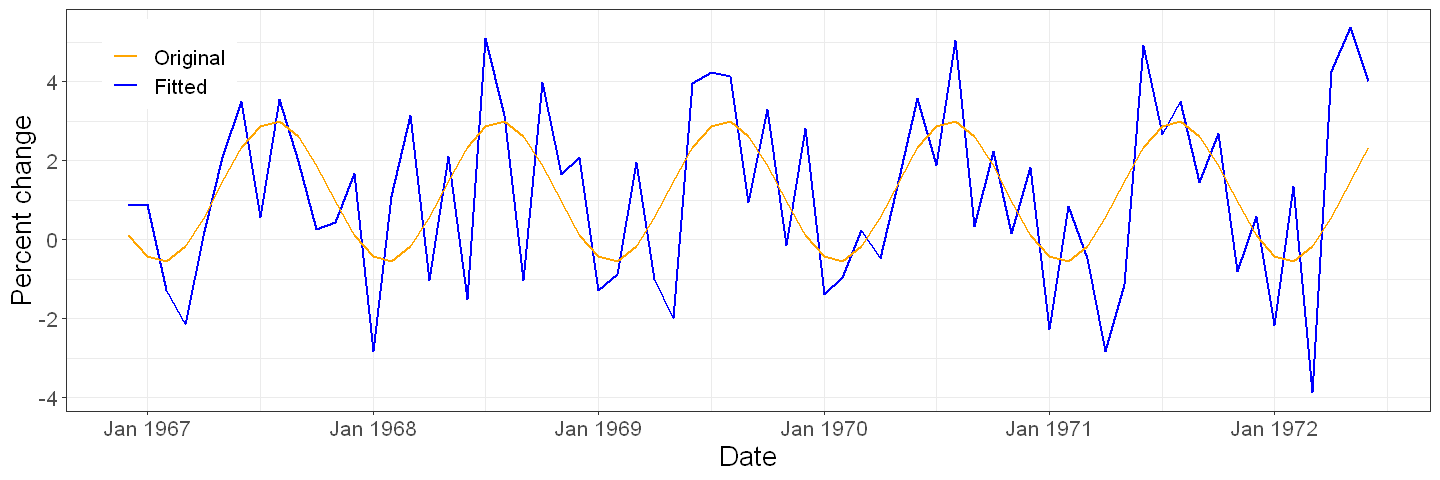

In [33]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data[-1,], aes(x=date)) + 
  geom_line(aes(y=percent_change, color='Original'), size=0.75) +
  geom_line(aes(y=fitted(model), color='Fitted'), size=0.75) +
  xlab('Date') + ylab('Percent change') + 
  theme_bw() + theme(text=element_text(size=16)) +
  scale_color_manual(
    values=c("Original" = "blue", "Fitted" = "orange"),
    labels = c("Original", "Fitted")
  ) +
  theme(
    legend.title=element_blank(),
    legend.position = c(.125, .975),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)
  )

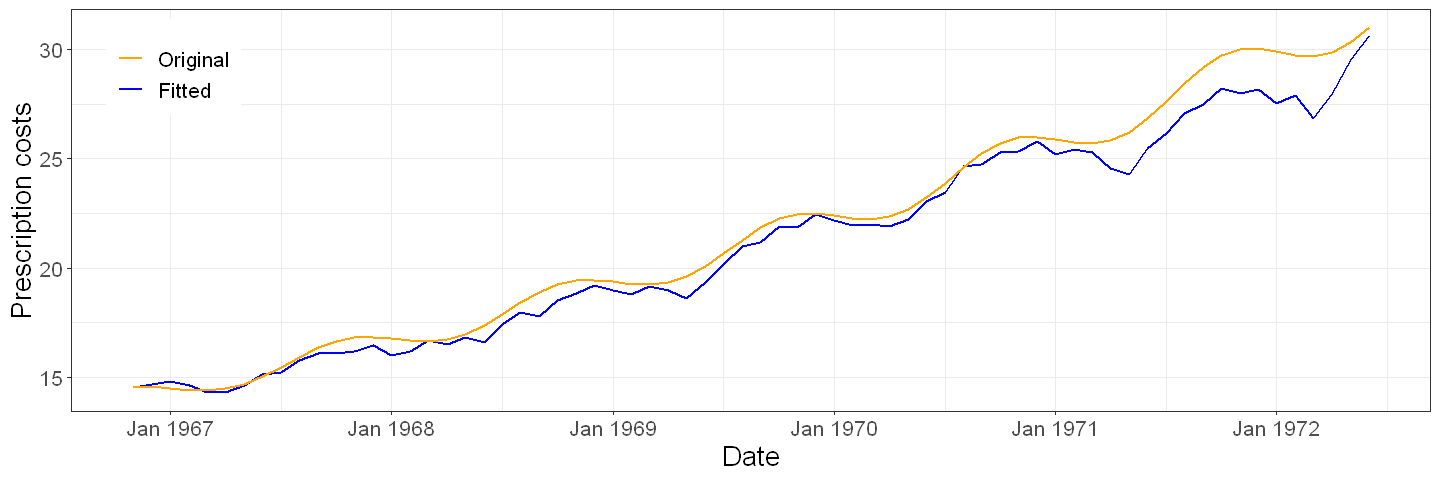

In [34]:
fitted_ratio = data[['prescrip']][1] * cumprod(c(1, fitted(model) / 100 + 1))

options(repr.plot.width=12, repr.plot.height=4)

ggplot(data, aes(x=date)) + 
  geom_line(aes(y=prescrip, color='Original'), size=0.75) +
  geom_line(aes(y=fitted_ratio, color='Fitted'), size=0.75) +
  xlab('Date') + ylab('Prescription costs') + 
  theme_bw() + theme(text=element_text(size=16)) +
  scale_color_manual(
    values=c("Original" = "blue", "Fitted" = "orange"),
    labels = c("Original", "Fitted")
  ) +
  theme(
    legend.title=element_blank(),
    legend.position = c(.125, .975),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)
  )

**(b)**

In [35]:
runs.test(factor(sign(rstandard(model))))


	Runs Test

data:  factor(sign(rstandard(model)))
Standard Normal = 3.1005, p-value = 0.001932
alternative hypothesis: two.sided


The Runs test indicates, with p-value of 1.9e-3, that the residuals are not white noise.  This is still under 0.01, but it is one of the best values seen so far.

**(c)**

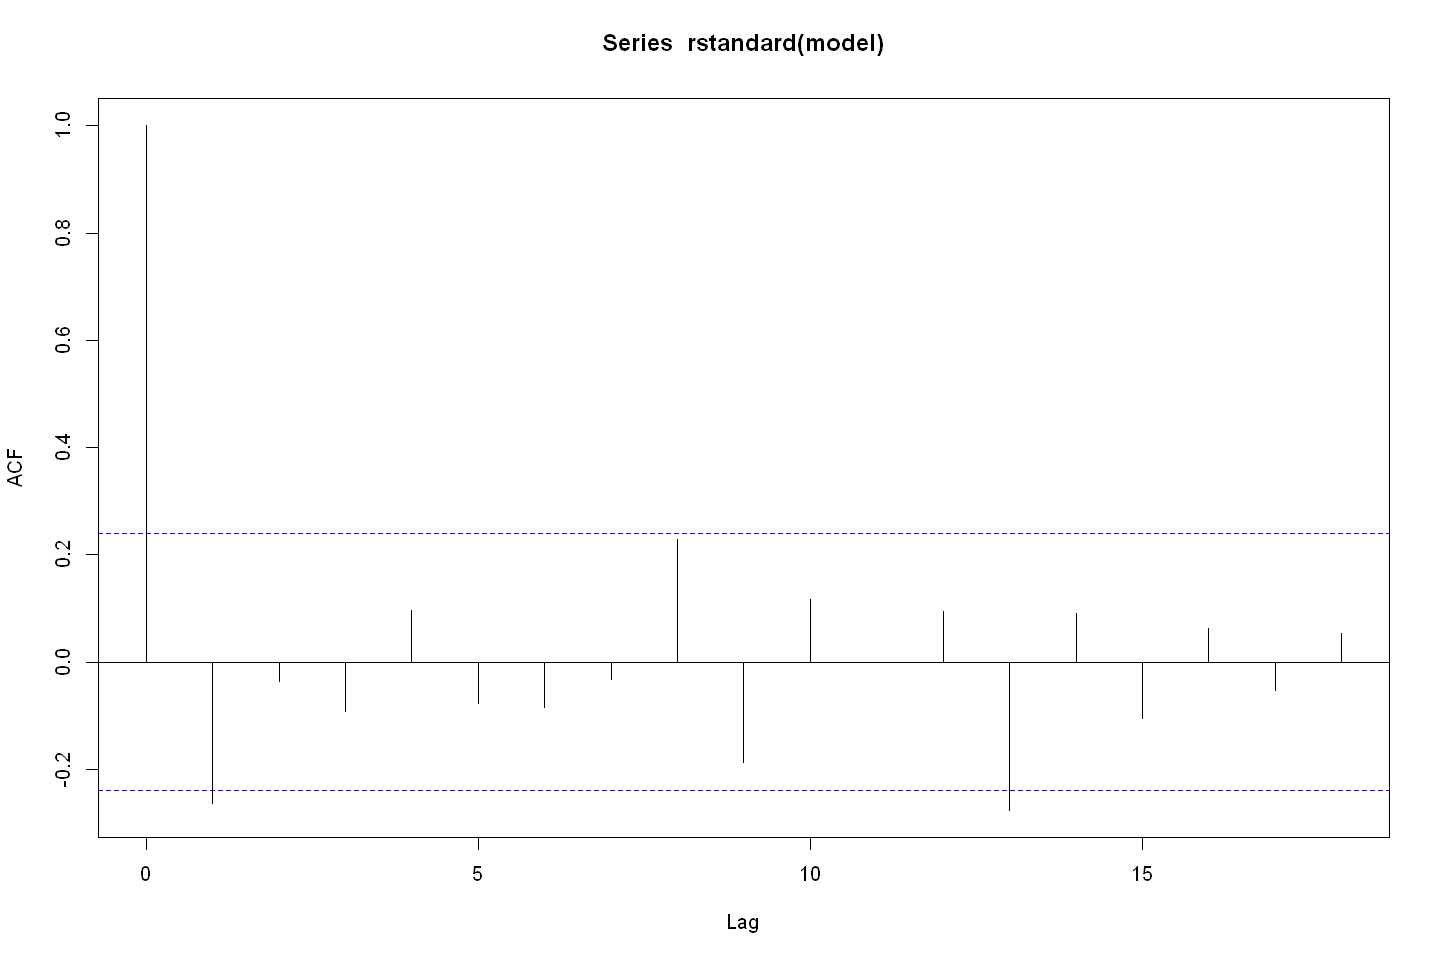

In [36]:
options(repr.plot.width=12, repr.plot.height=8)
acf(rstandard(model))

Most autocorrelation values are this time inside the shaded area, other than the lag $k = 1$.  This would seem to indicate that no lags are particularly impactful by themselves.

**(d)**

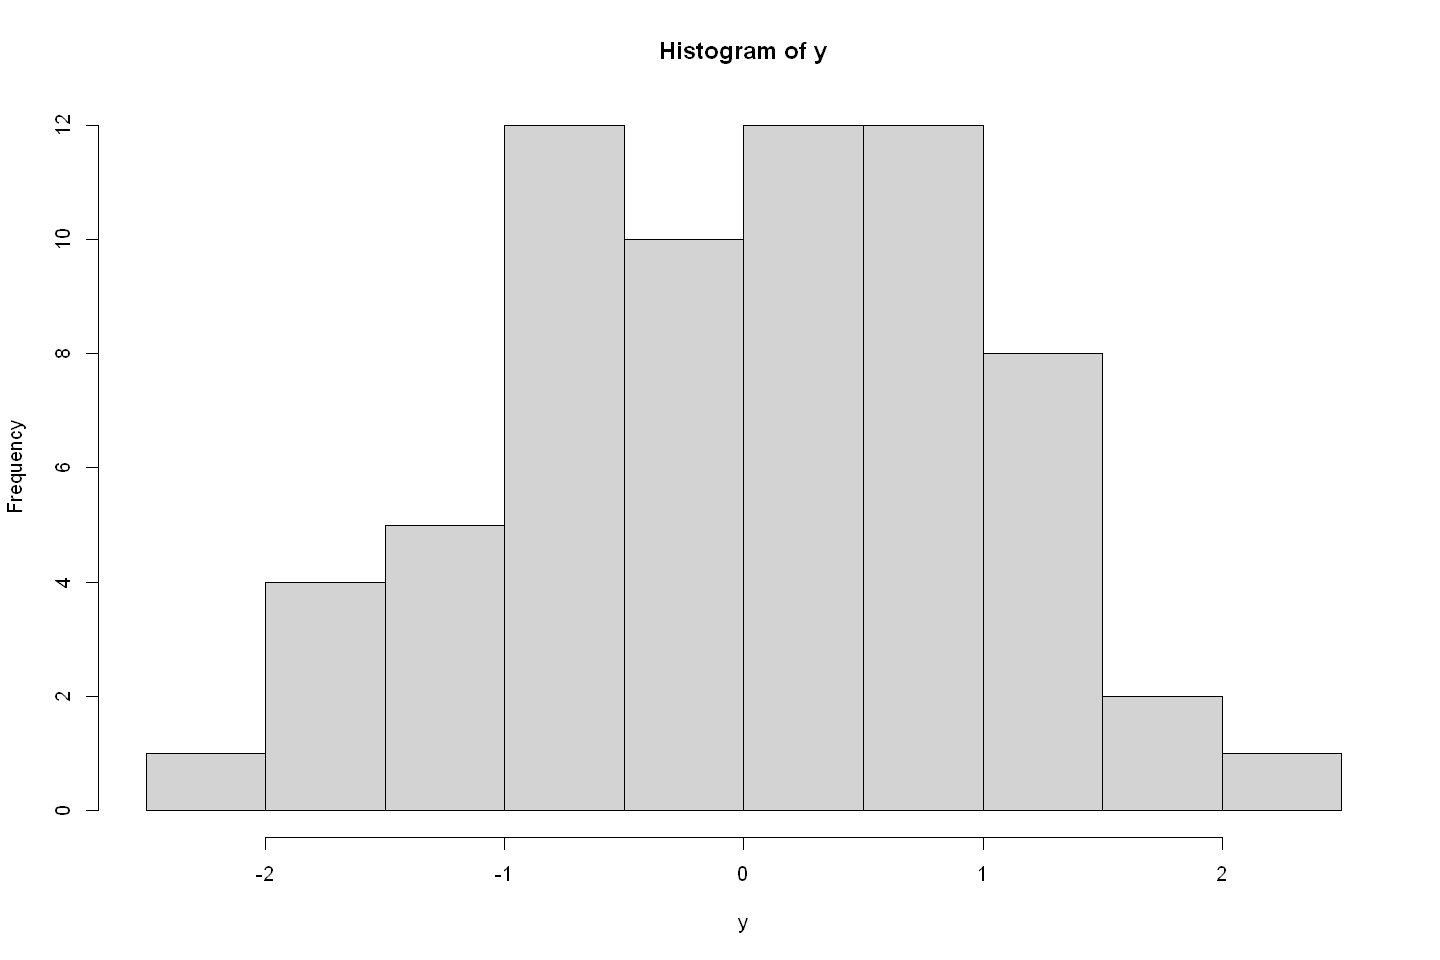

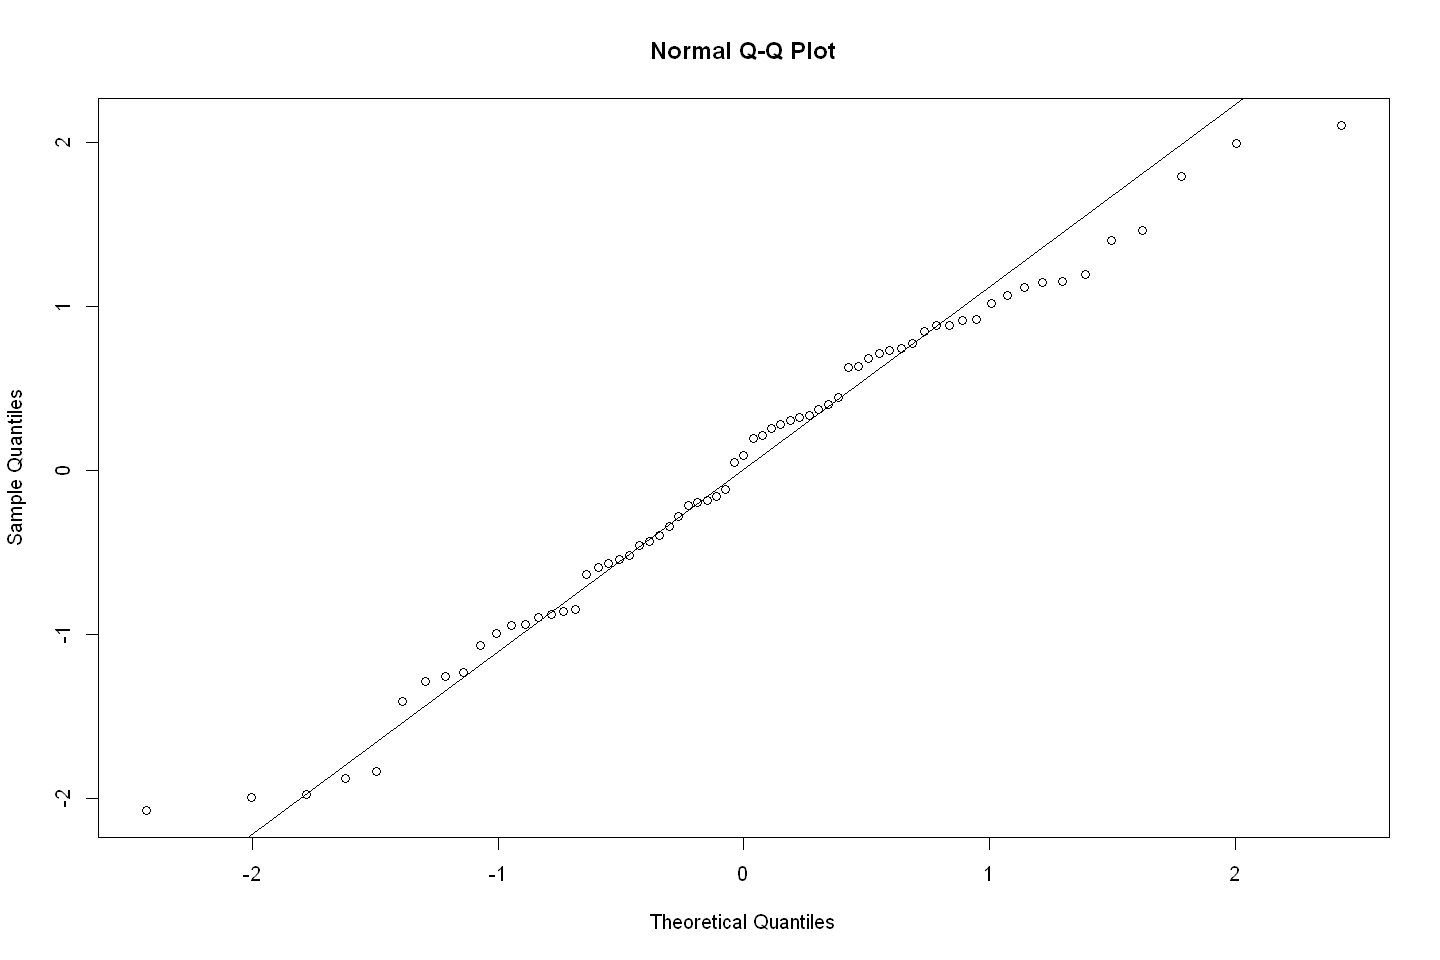

In [37]:
y = rstandard(model)
hist(y)
qqnorm(y); qqline(y)

Histograms clearly show that the residuals do not follow a normal distribution; Q-Q plot also suggests oscillations.

**Exercise 3.16**.  Suppose that a stationary time series, $\{Y_t\}$, has an autocorrelation function of the form $\rho_k = \phi^k$ for $k > 0$, where $\phi$ is a constant in the range (-1, +1).

**(a)**  Show that 

$$\text{Var}[\overline{Y}] = \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} - \frac{2\phi}{n} \frac{(1 - \phi^n)}{(1 - \phi)^2} \right] $$

(Hint:  Use Equation (3.2.3) on page 28, the finite geometric sum $\sum_{k=0}^n \phi^k = \frac{1 - \phi^{n+1}}{1 - \phi}$, and the related sum $\sum_{k=0}^n k \phi^{k-1} = \frac{d}{d\phi} \left[ \sum_{k=0}^n \phi^k \right]$.)

**(b)**  If $n$ is large, argue that $\text{Var}[\overline{Y}] \approx \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} \right]$.

**(c)**  Plot $(1 + \phi) / (1 - \phi)$ for $\phi$ for the range -1 to +1.  Interpret the plot in terms of the precision in estimating the process mean.

**Solution**.

**(a)**  Equation 3.2.3 states that

$$ \text{Var}[\overline{Y}] = \frac{\gamma_0}{n} \left[1 + 2\sum_{k=1}^{n-1} \left( 1 - \frac{k}{n} \right)\rho_k \right] $$

Replacing the given value for the autocorrelation $\rho_k$, we get

$$ 
\begin{align}
\text{Var}[\overline{Y}] 
&= \frac{\gamma_0}{n} \left[1 + 2\sum_{k=1}^{n-1} \left( 1 - \frac{k}{n} \right)\phi^k \right] \\
&= \frac{\gamma_0}{n} \left[-1 + 2\sum_{k=0}^{n-1} \phi^k - \frac{2}{n} \sum_{k=0}^{n - 1} k \phi^k \right] \\
&= \frac{\gamma_0}{n} \left[-1 + 2 \left( \frac{1 - \phi^n}{1 - \phi} \right) - \frac{2}{n} \left( \frac{(n-1)\phi^n - n \phi^{n - 1} + 1}{(1 - \phi)^2} \right) \right] \\
&= \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} - \frac{2\phi}{n} \frac{(1 - \phi^n)}{(1 - \phi)^2} \right]
\end{align}
$$

where we have used the geometric finite sums

$$ \sum_{k=0}^n \phi^k = \frac{1 - \phi^{n+1}}{1 - \phi}
\quad \text{and} \quad
\sum_{k=0}^n k \phi^k = \frac{d}{d\phi} \left[ \sum_{k=0}^n \phi^k \right] = \frac{(n-1)\phi^n - n \phi^{n-1} + 1}{(1 - \phi)^2} $$

and skipped the algebraic manipulation steps.

**(b)**  For large $n$, the term $- \frac{2\phi}{n} \frac{(1 - \phi^n)}{(1 - \phi)^2}$ tends to 0 with $O(n^{-1})$, and so $\text{Var}[\overline{Y}]$ goes to the specified limit.

**(c)**

Loading required package: latex2exp



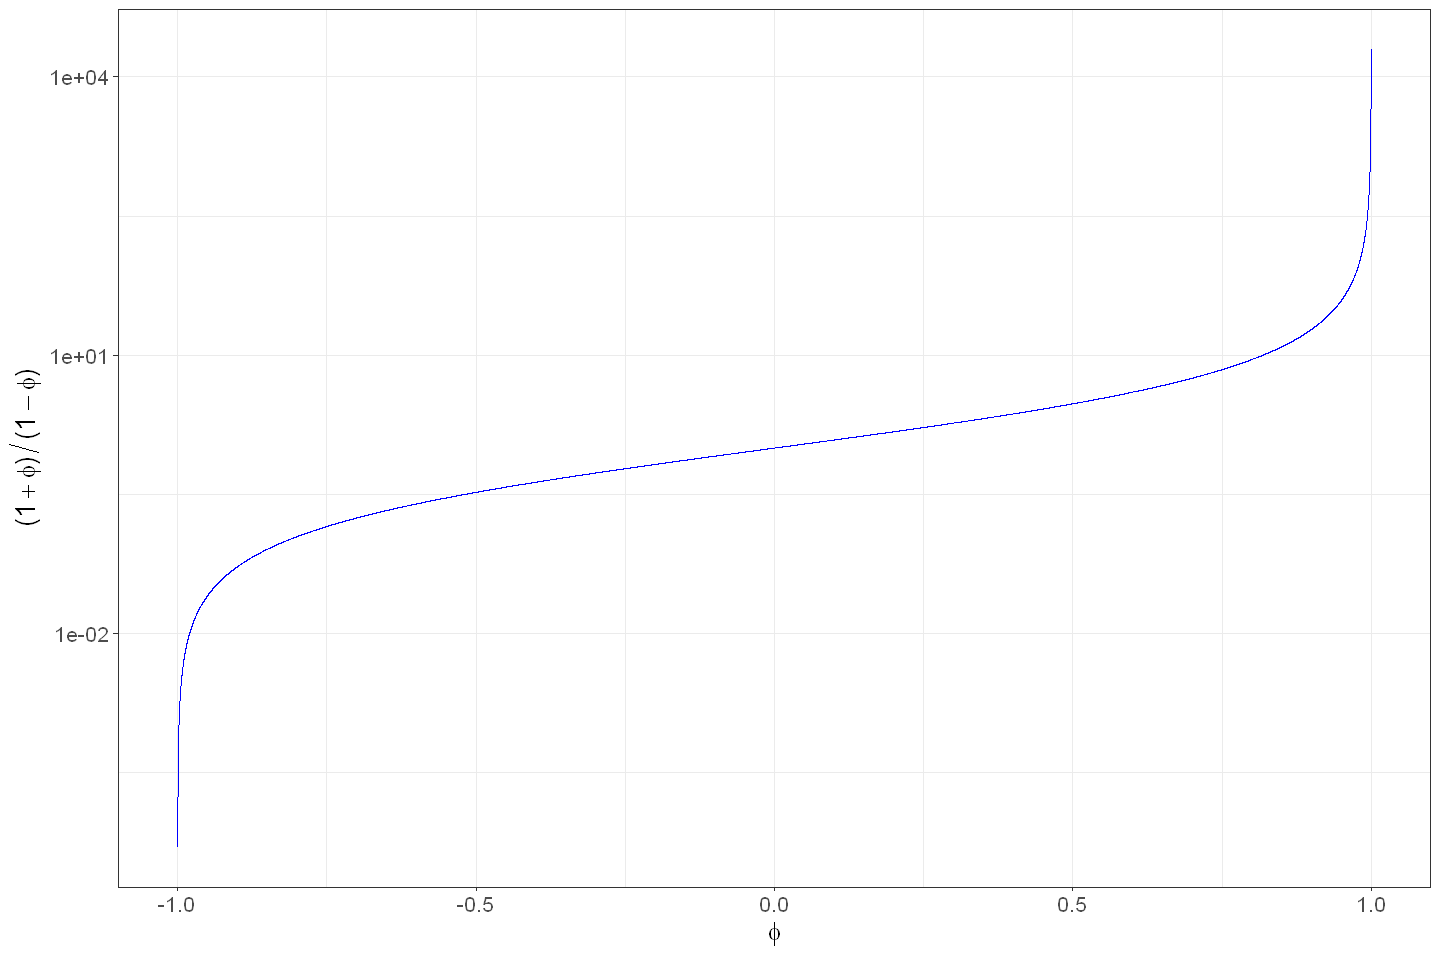

In [38]:
epsilon = 1e-4
phi = seq(from=-1 + epsilon, to=1-epsilon, by=epsilon)

require(latex2exp)

ggplot() +
  geom_line(aes(x=phi, y=(1+phi)/(1-phi)), color='blue') +
  xlab(TeX("$\\phi$")) + ylab(TeX("$(1 + \\phi) / (1 - \\phi)$")) + scale_y_log10() +
  theme_bw() + theme(text=element_text(size=16))

As seen in the log plot above, the fraction goes to zero as $\phi$ approaches -1, and the fraction goes to infinity are $\phi$ approaches 1.  This indicates that the variance of the sample mean is reduced for smaller $\phi$ making easier to estimate the process mean, for the smaller $\phi$ values, while it explodes for larger $\phi$, making it more difficult to estimate the process mean.

**Exercise 3.17**.  Verify Equation (3.2.6) on page 29.  (Hint:  You will need the fact that $ \sum_{k=0}^\infty \phi^k = \frac{1}{1 - \phi}$ for $-1 < \phi < 1$.)

**Solution**.  Equation 3.2.6 states that, given that the autocorrelation is $\rho_k = \phi^{|k|}$ for all $k$,

$$ \text{Var}[\overline{Y}] \approx \frac{1 + \phi}{1 - \phi} \frac{\gamma_0}{n} $$

The result follows in almost the same manner as in exercise 3.16 (and was stated as a comment in (b)).  From it, we have:

$$ 
\text{Var}[\overline{Y}] = \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} - \frac{2\phi}{n} \frac{(1 - \phi^n)}{(1 - \phi)^2} \right] = \frac{\gamma_0}{n} \left[ \frac{1 + \phi}{1 - \phi} - O(n^{-1}) \right]
$$

and so the result follows.

**Exercise 3.18**.   Verify Equation (3.2.7)  on page 30.  (Hint:  you will need the two sums $\sum_{t=1}^n t = \frac{n(n+1)}{2}$ and $\sum_{t=1}^n t^2 = \frac{n(n+1)(2n + 1)}{6}$.)

**Solution**.  Equation 3.2.7 states that, for a random walk process,

$$ \text{Var}[\overline{Y}] = \sigma_e^2 (2n + 1) \frac{n + 1}{6n} $$

The result is immediate from the given deduction,

$$ \text{Var}[\overline{Y}] = \frac{1}{n^2}\text{Var}\left[\sum_{i=1}^n Y_i\right] 
= \frac{1}{n^2}\text{Var}\left[\sum_{i=1}^n \sum_{j=1}^i e_i \right]
= \frac{1}{n^2}\text{Var}\left[\sum_{k=1}^n k e_k \right]
= \frac{1}{n^2} \sum_{k=1}^n \sigma_e^2 k^2
= \sigma_e^2 (2n + 1) \frac{n + 1}{6n}
$$